In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
import random
import math
import operator
import matplotlib.colors as mcolors
plt.style.use("fivethirtyeight")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-16-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-16-2020.csv')

In [ ]:
confirmed_df.head()

Province/State Country/Region       Lat  ...  7/17/20  7/18/20  7/19/20
0            NaN    Afghanistan  33.93911  ...    35229    35301    35475
1            NaN        Albania  41.15330  ...     3906     4008     4090
2            NaN        Algeria  28.03390  ...    21948    22549    23084
3            NaN        Andorra  42.50630  ...      880      880      880
4            NaN         Angola -11.20270  ...      638      687      705

[5 rows x 184 columns]

In [ ]:
cols=confirmed_df.keys()

In [ ]:
confirmed=confirmed_df.loc[:,cols[4]:cols[-1]]
deaths=deaths_df.loc[:,cols[4]:cols[-1]]
recoveries=recoveries_df.loc[:,cols[4]:cols[-1]]

In [ ]:
latest_data.head()

FIPS     Admin2  ... Incidence_Rate Case-Fatality_Ratio
0  45001.0  Abbeville  ...     693.113711            1.176471
1  22001.0     Acadia  ...    2536.868402            3.049555
2  51001.0   Accomack  ...    3233.692289            1.339713
3  16001.0        Ada  ...    1065.643383            0.584567
4  19001.0      Adair  ...     265.659955            0.000000

[5 rows x 14 columns]

In [ ]:
dates=confirmed.keys()
total_confirmed=[]
total_death=[]
total_recovered=[]
total_active=[]

mortality_rate=[]
recovery_rate=[]

us_cases=[]
iran_cases=[]
brazil_cases=[]
russia_cases=[]
uk_cases=[]
chile_cases=[]
peru_cases=[]
mexico_cases=[]
india_cases=[]


us_death=[]
iran_death=[]
brazil_death=[]
russia_death=[]
uk_death=[]
chile_death=[]
peru_death=[]
mexico_death=[]
india_death=[]


us_recoveries=[]
iran_recoveries=[]
brazil_recoveries=[]
russia_recoveries=[]
uk_recoveries=[]
chile_recoveries=[]
peru_recoveries=[]
mexico_recoveries=[]
india_recoveries=[]


for i in dates:
    
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovery_sum=recoveries[i].sum()
    
    total_confirmed.append(confirmed_sum)
    total_death.append(death_sum)
    total_recovered.append(recovery_sum)
    total_active.append(confirmed_sum-(death_sum+recovery_sum))
    
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovery_sum/confirmed_sum)
    
    
    us_cases.append(confirmed_df[confirmed_df["Country/Region"]=="US"][i].sum())
    iran_cases.append(confirmed_df[confirmed_df["Country/Region"]=="Iran"][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df["Country/Region"]=="Brazil"][i].sum())
    russia_cases.append(confirmed_df[confirmed_df["Country/Region"]=="Russia"][i].sum())
    uk_cases.append(confirmed_df[confirmed_df["Country/Region"]=="United Kingdom"][i].sum())
    chile_cases.append(confirmed_df[confirmed_df["Country/Region"]=="Chile"][i].sum())
    peru_cases.append(confirmed_df[confirmed_df["Country/Region"]=="Peru"][i].sum())
    mexico_cases.append(confirmed_df[confirmed_df["Country/Region"]=="Mexico"][i].sum())
    india_cases.append(confirmed_df[confirmed_df["Country/Region"]=="India"][i].sum())
    
    
    us_death.append(deaths_df[deaths_df["Country/Region"]=="US"][i].sum())
    iran_death.append(deaths_df[deaths_df["Country/Region"]=="Iran"][i].sum())
    brazil_death.append(deaths_df[deaths_df["Country/Region"]=="Brazil"][i].sum())
    russia_death.append(deaths_df[deaths_df["Country/Region"]=="Russia"][i].sum())
    uk_death.append(deaths_df[deaths_df["Country/Region"]=="United Kingdom"][i].sum())
    chile_death.append(deaths_df[deaths_df["Country/Region"]=="Chile"][i].sum())
    peru_death.append(deaths_df[deaths_df["Country/Region"]=="Peru"][i].sum())
    mexico_death.append(deaths_df[deaths_df["Country/Region"]=="Mexico"][i].sum())
    india_death.append(deaths_df[deaths_df["Country/Region"]=="India"][i].sum())
    
    
    us_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="US"][i].sum())
    iran_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="Iran"][i].sum())
    brazil_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="Brazil"][i].sum())
    russia_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="Russia"][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="United Kingdom"][i].sum())
    chile_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="Chile"][i].sum())
    peru_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="Peru"][i].sum())
    mexico_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="Mexico"][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df["Country/Region"]=="India"][i].sum())


In [ ]:
def daily_increases(data):
    d=[]
    for i in range(len(data)):
        if i==0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d


confirmed_daily_increase=daily_increases(total_confirmed)
death_daily_increase=daily_increases(total_death)
recovered_daily_increase=daily_increases(total_recovered)


us_daily_increase=daily_increases(us_cases)
iran_daily_increase=daily_increases(iran_cases)
brazil_daily_increase=daily_increases(brazil_cases)
russia_daily_increase=daily_increases(russia_cases)
uk_daily_increase=daily_increases(uk_cases)
chile_daily_increase=daily_increases(chile_cases)
peru_daily_increase=daily_increases(peru_cases)
mexico_daily_increase=daily_increases(mexico_cases)
india_daily_increase=daily_increases(india_cases)


us_daily_death=daily_increases(us_death)
iran_daily_death=daily_increases(iran_death)
brazil_daily_death=daily_increases(brazil_death)
russia_daily_death=daily_increases(russia_death)
uk_daily_death=daily_increases(uk_death)
chile_daily_death=daily_increases(chile_death)
peru_daily_death=daily_increases(peru_death)
mexico_daily_death=daily_increases(mexico_death)
india_daily_death=daily_increases(india_death)



us_daily_recoveries=daily_increases(us_recoveries)
iran_daily_recoveries=daily_increases(iran_recoveries)
brazil_daily_recoveries=daily_increases(brazil_recoveries)
russia_daily_recoveries=daily_increases(russia_recoveries)
uk_daily_recoveries=daily_increases(uk_recoveries)
chile_daily_recoveries=daily_increases(chile_recoveries)
peru_daily_recoveries=daily_increases(peru_recoveries)
mexico_daily_recoveries=daily_increases(mexico_recoveries)
india_daily_recoveries=daily_increases(india_recoveries)



In [ ]:
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
total_confirmed=np.array(total_confirmed).reshape(-1,1)
total_death=np.array(total_death).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [ ]:
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [ ]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]
adjusted_dates

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.]),
 <a list of 9 Text major ticklabel objects>)

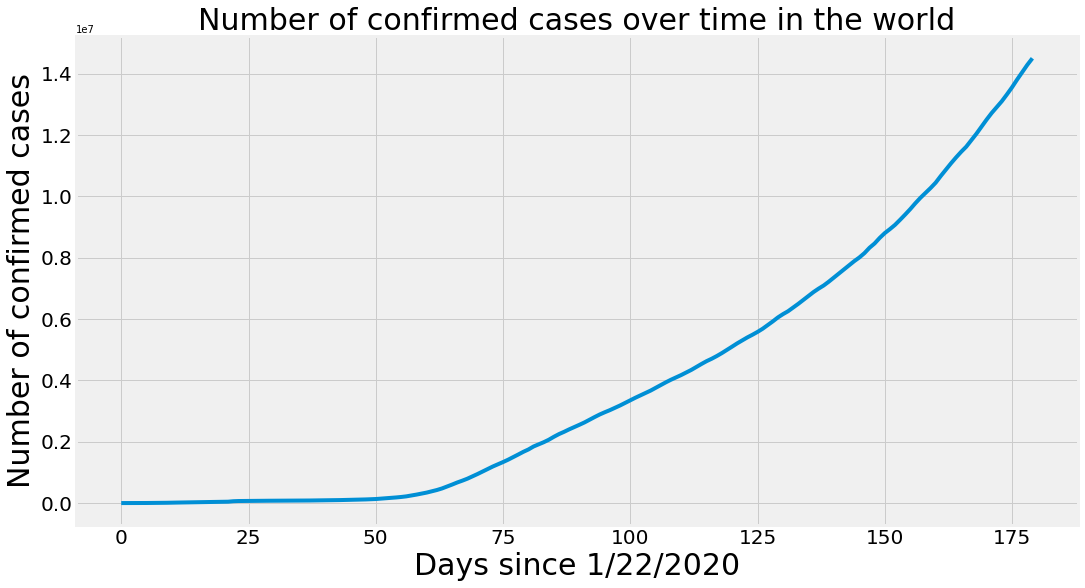

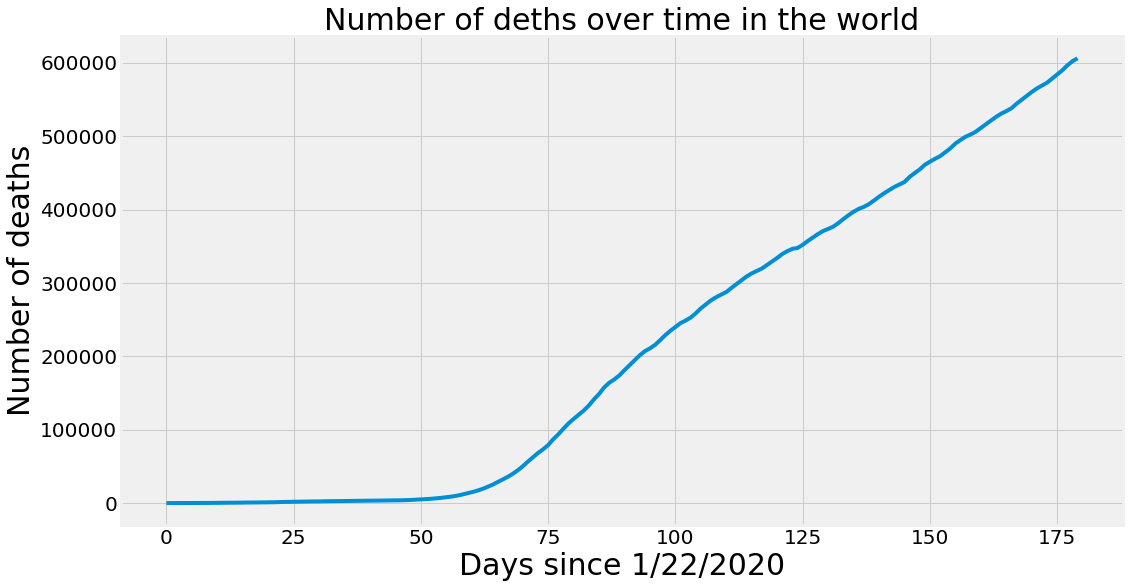

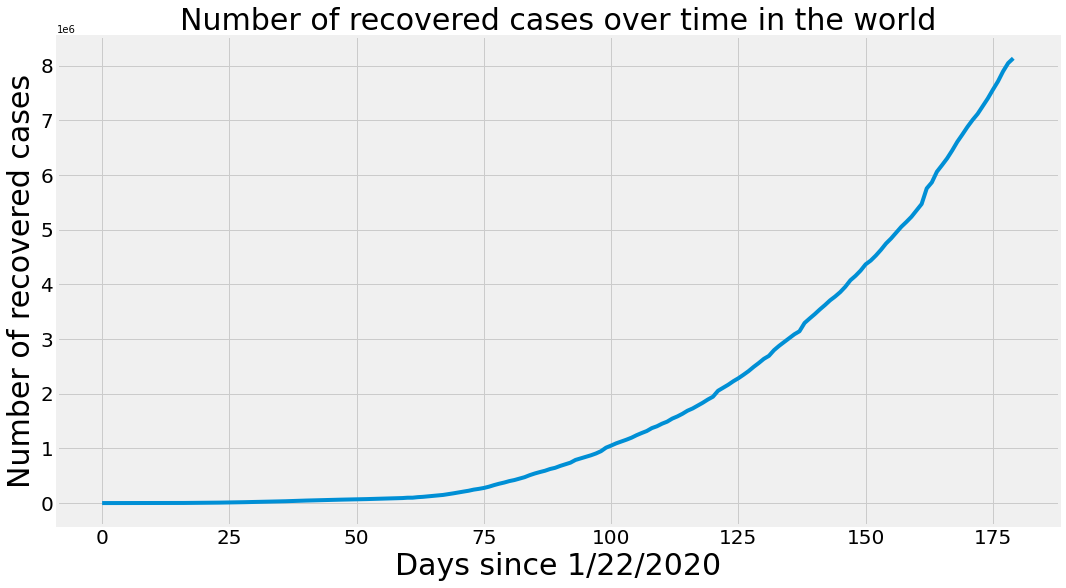

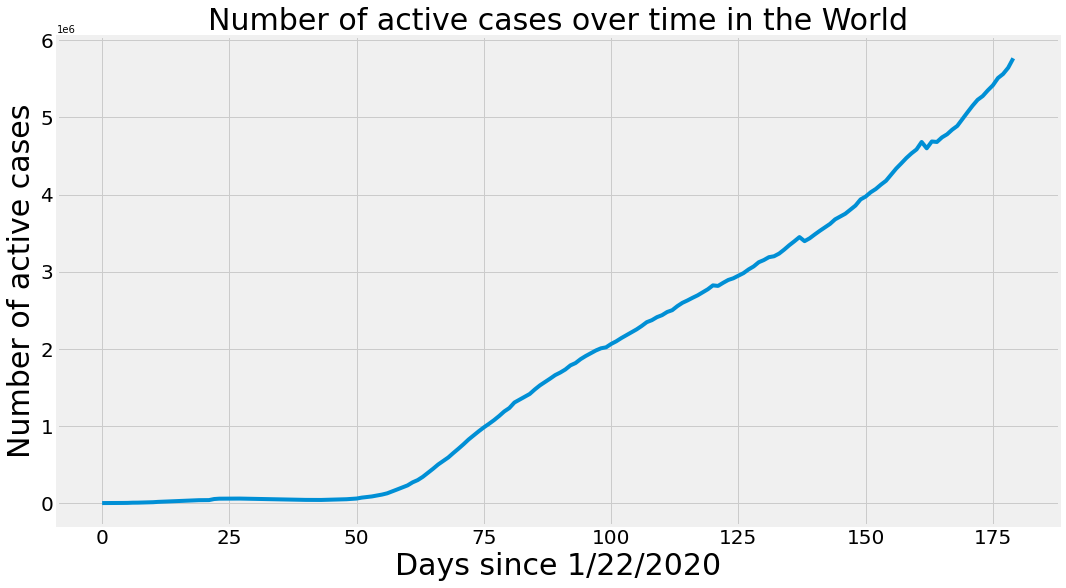

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_confirmed)
plt.title("Number of confirmed cases over time in the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of confirmed cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)


plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_death)
plt.title("Number of deths over time in the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of deaths",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_recovered)
plt.title("Number of recovered cases over time in the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of recovered cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_active)
plt.title("Number of active cases over time in the World",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of active cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text major ticklabel objects>)

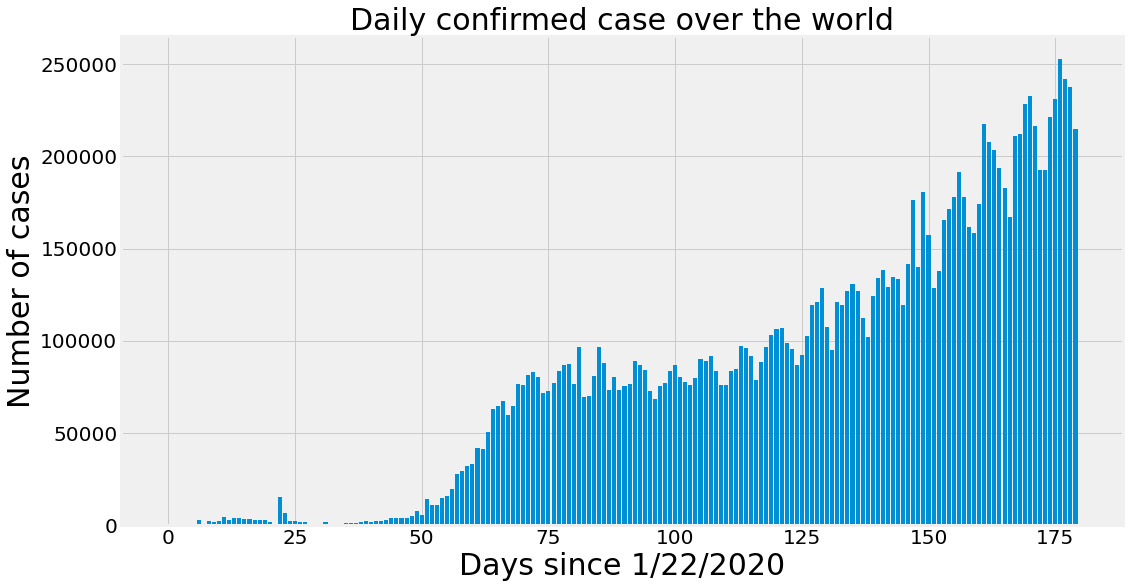

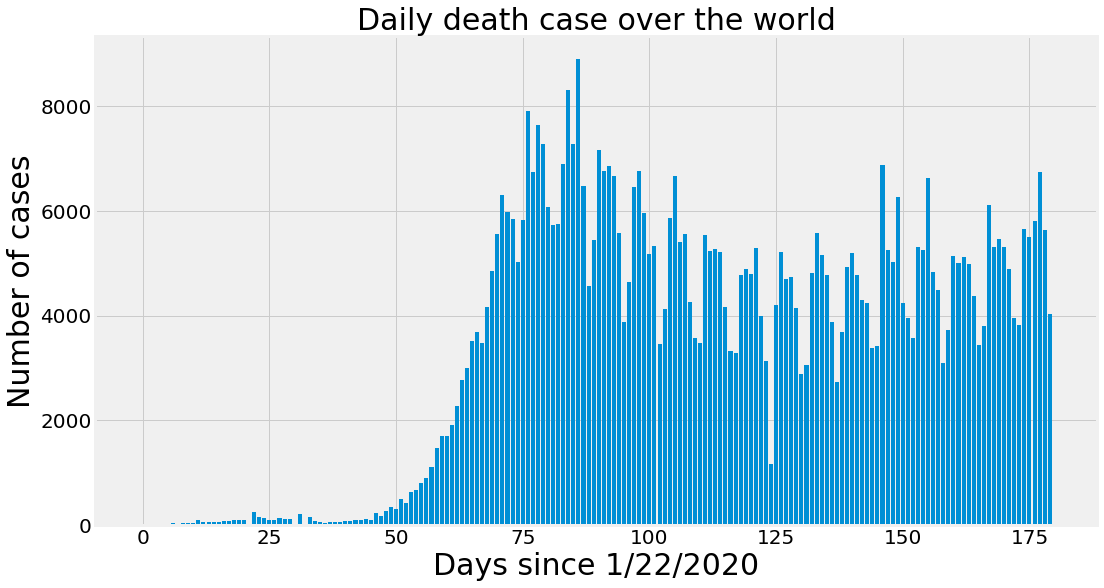

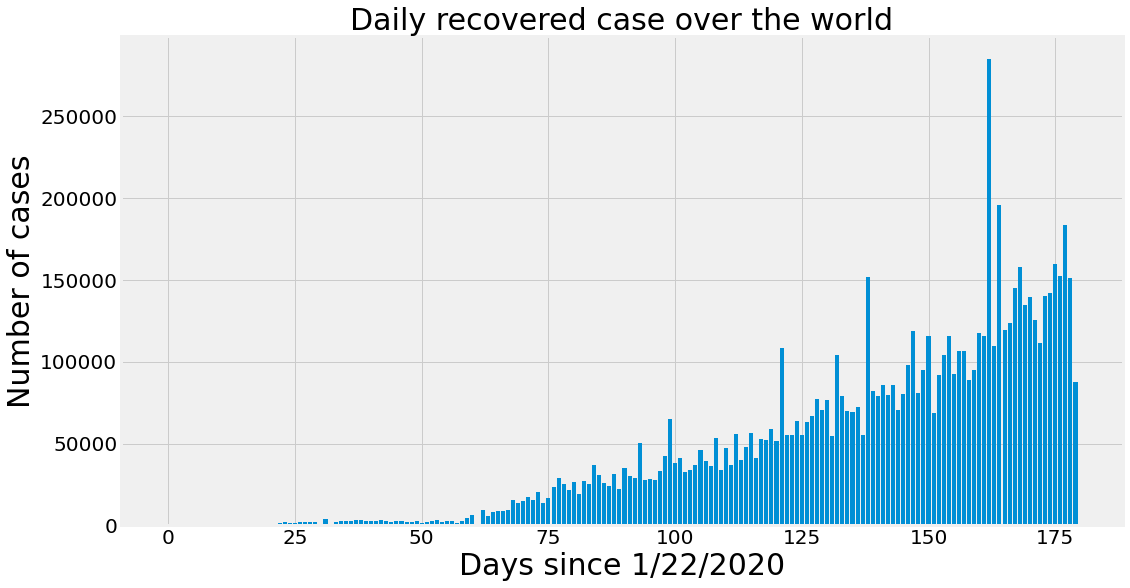

In [ ]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates,confirmed_daily_increase)
plt.title("Daily confirmed case over the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)


plt.figure(figsize=(16,9))
plt.bar(adjusted_dates,death_daily_increase)
plt.title("Daily death case over the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)


plt.figure(figsize=(16,9))
plt.bar(adjusted_dates,recovered_daily_increase)
plt.title("Daily recovered case over the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

(array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Text major ticklabel objects>)

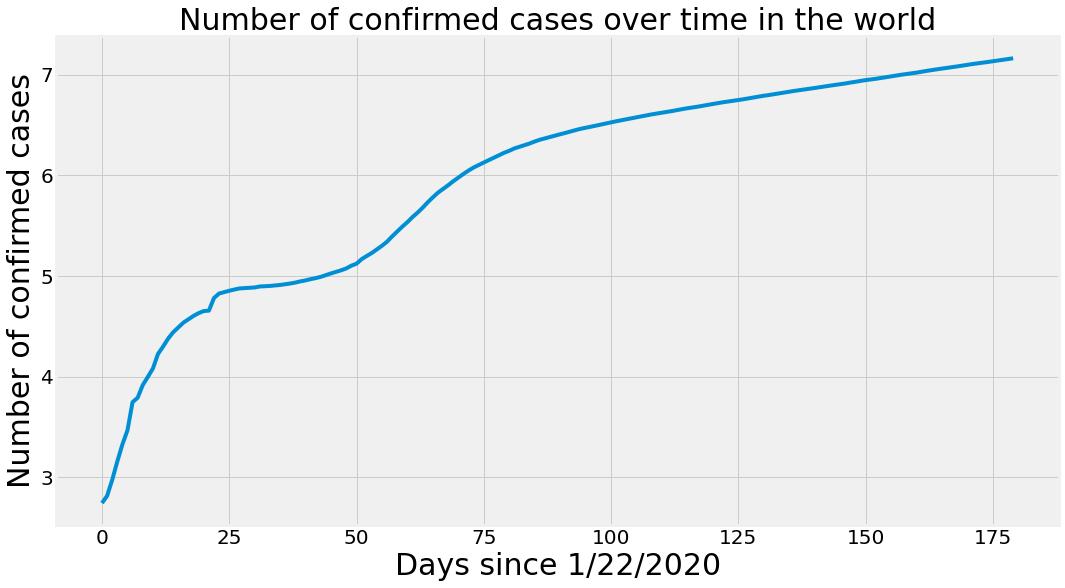

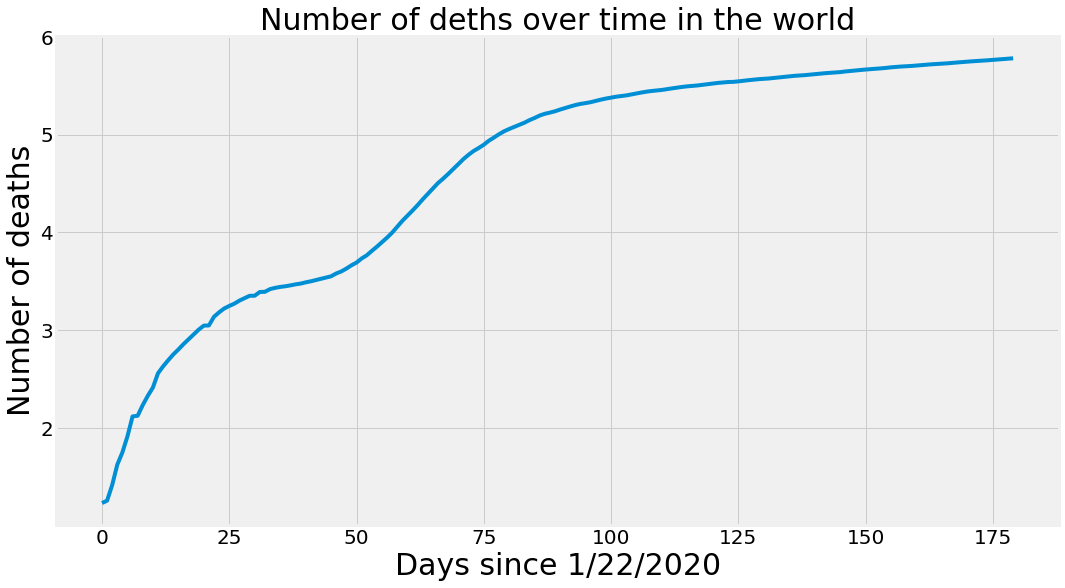

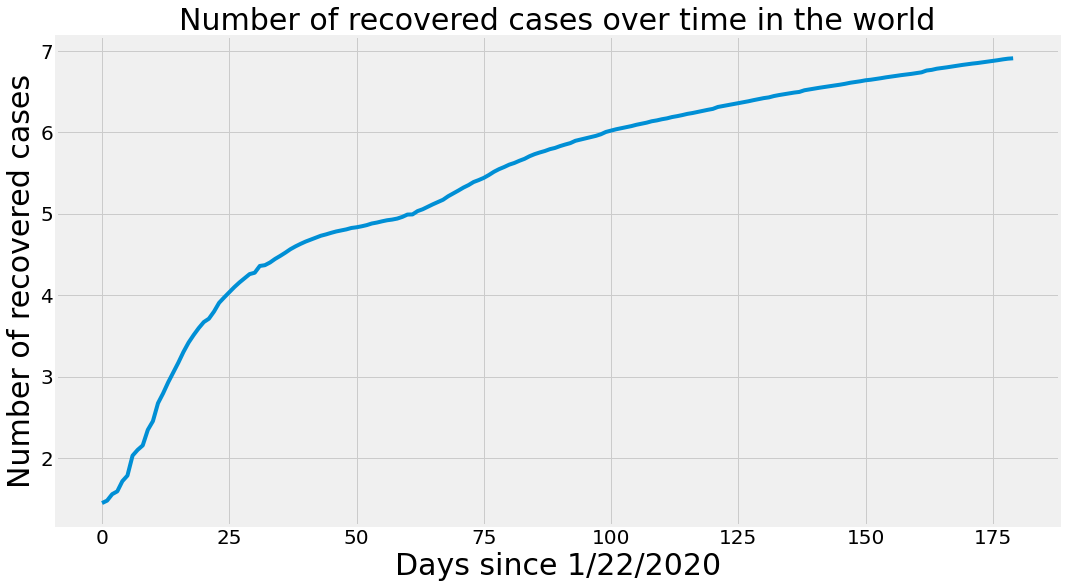

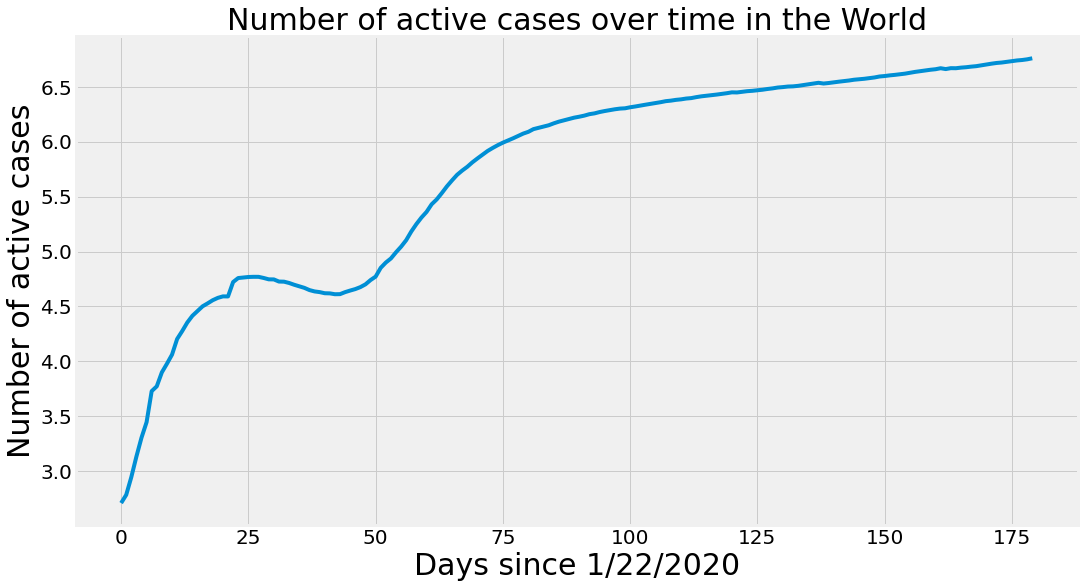

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,np.log10(total_confirmed))
plt.title("Number of confirmed cases over time in the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of confirmed cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)


plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,np.log10(total_death))
plt.title("Number of deths over time in the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of deaths",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,np.log10(total_recovered))
plt.title("Number of recovered cases over time in the world",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of recovered cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,np.log10(total_active))
plt.title("Number of active cases over time in the World",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of active cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)


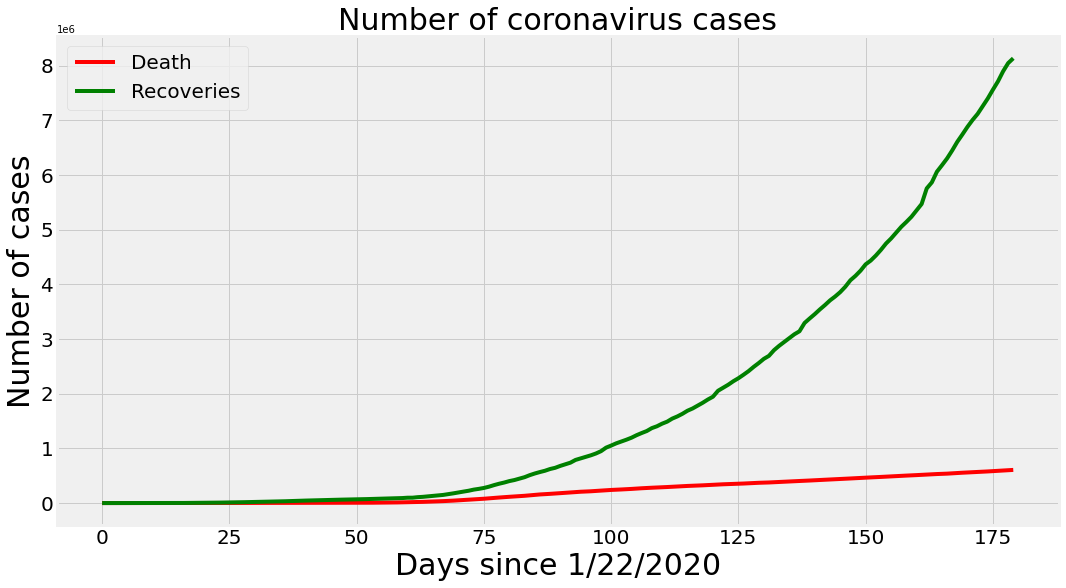

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_death,color="r")
plt.plot(adjusted_dates,total_recovered,color="green")
plt.title("Number of coronavirus cases",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(["Death","Recoveries"],fontsize=20)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 <a list of 9 Text major ticklabel objects>)

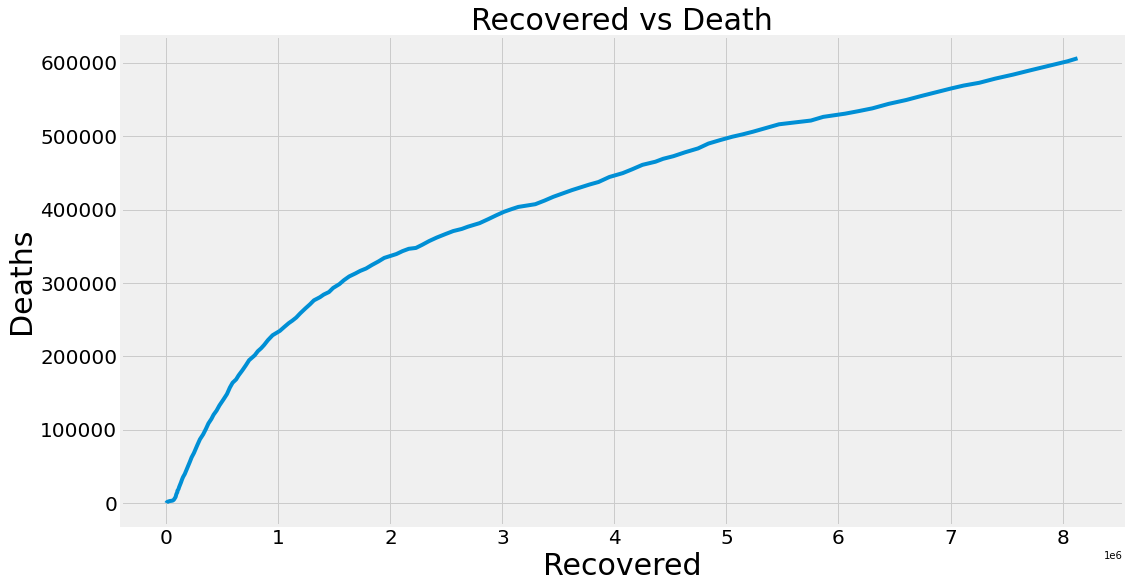

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(total_recovered,total_death)
plt.title("Recovered vs Death",size=30)
plt.xlabel("Recovered",size=30)
plt.ylabel("Deaths",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]),
 <a list of 8 Text major ticklabel objects>)

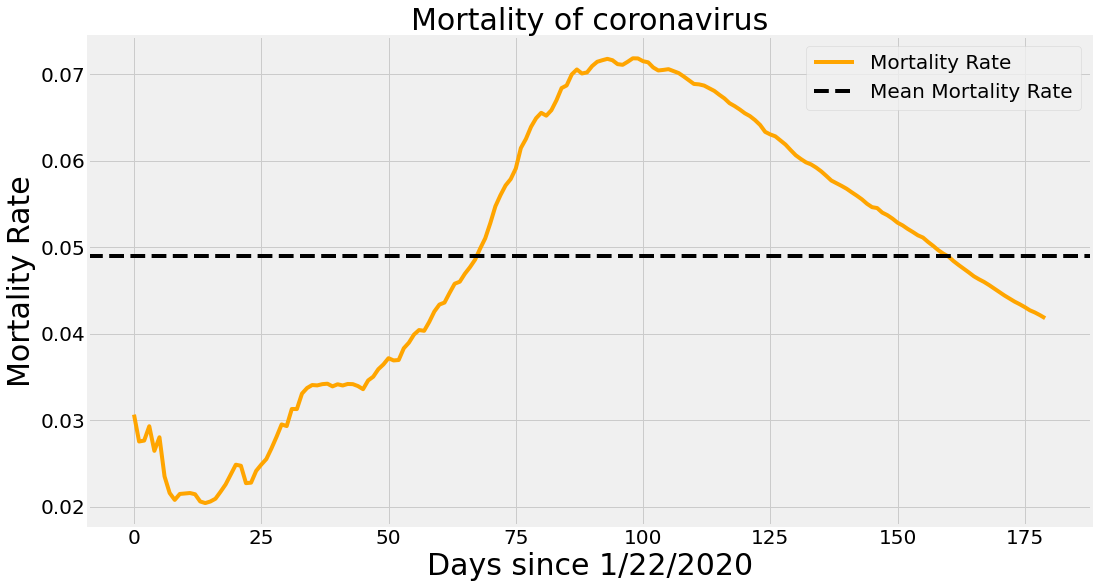

In [ ]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,mortality_rate,color="orange")
plt.axhline(y=mean_mortality_rate,linestyle="--",color="black")
plt.legend(["Mortality Rate","Mean Mortality Rate"],fontsize=20)
plt.title("Mortality of coronavirus",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Mortality Rate",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <a list of 8 Text major ticklabel objects>)

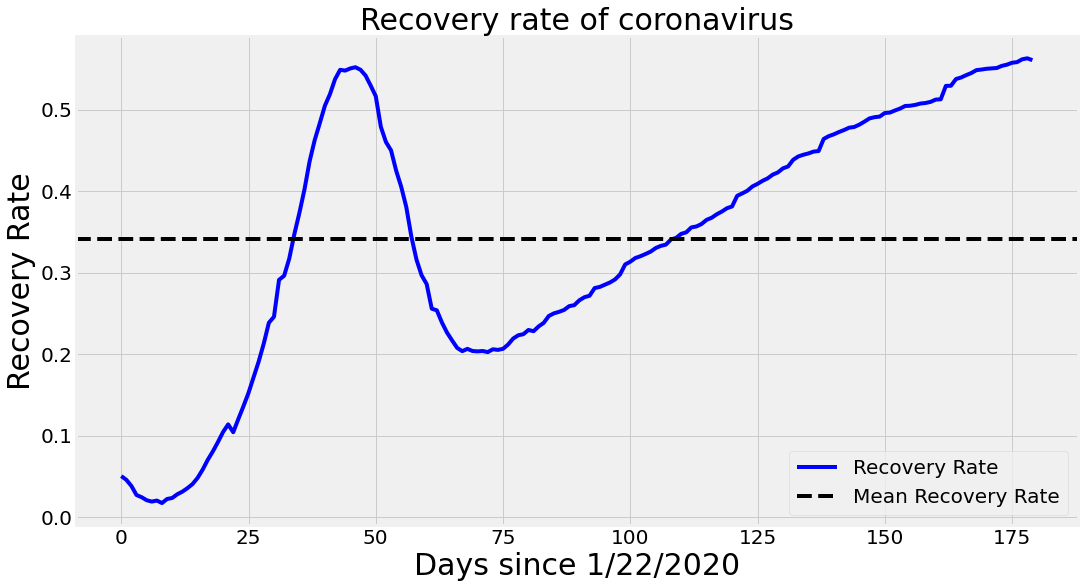

In [ ]:
mean_recovery_rate=np.mean(recovery_rate)
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,recovery_rate,color="blue")
plt.axhline(y=mean_recovery_rate,linestyle="--",color="black")
plt.legend(["Recovery Rate","Mean Recovery Rate"],fontsize=20)
plt.title("Recovery rate of coronavirus",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Recovery Rate",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

In [ ]:
unique_countries=list(latest_data["Country_Region"].unique())

In [ ]:
country_confirmed_cases=[]
country_death_cases=[]
country_recovered_cases=[]
country_active_cases=[]
country_mortality_rate=[]
country_recovery_rate=[]

country_with_no_case=[]

for i in unique_countries:
    cases=latest_data[latest_data.Country_Region==i]["Confirmed"].sum()
    if(cases>0):
        country_confirmed_cases.append(cases)
    else:
        country_with_no_case.append(i)

for i in country_with_no_case:
    unique_countries.remove(i)
    

unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key= lambda x:x[1],reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_data[latest_data.Country_Region==unique_countries[i]]["Confirmed"].sum()
    country_death_cases.append(latest_data[latest_data.Country_Region==unique_countries[i]]["Deaths"].sum())
    country_recovered_cases.append(latest_data[latest_data.Country_Region==unique_countries[i]]["Recovered"].sum())
    country_active_cases.append(latest_data[latest_data.Country_Region==unique_countries[i]]["Active"].sum())
    country_mortality_rate.append((country_death_cases[i]/country_confirmed_cases[i]))
    country_recovery_rate.append((country_recovered_cases[i]/country_confirmed_cases[i]))
    
    
        

In [ ]:
country_data=pd.DataFrame({"Country":unique_countries,
                          "Confirmed":country_confirmed_cases,
                          "Deaths":country_death_cases,
                          "Recovered":country_recovered_cases,
                          "Active":country_active_cases,
                          "Mortality_Rate":country_mortality_rate,
                          "Recovery_Rate":country_recovery_rate})
country_data.style.background_gradient("Greens")

In [ ]:
def country_info(x,y1,y2,y3,y4,country):
  plt.figure(figsize=(16,9))
  plt.title("{} confirmed cases over time".format(country),size=30)
  plt.plot(adjusted_dates,y1)
  plt.xlabel("Days since 1/22/2020",size=30)
  plt.ylabel("Number of cases",size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)


  plt.figure(figsize=(16,9))
  plt.title("{} confirmed cases daily".format(country),size=30)
  plt.bar(x,y2)
  plt.xlabel("Days since 1/22/2020",size=30)
  plt.ylabel("Number of cases",size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)


  plt.figure(figsize=(16,9))
  plt.title("{} death cases daily".format(country),size=30)
  plt.bar(x,y3)
  plt.xlabel("Days since 1/22/2020",size=30)
  plt.ylabel("Number of cases",size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)


  plt.figure(figsize=(16,9))
  plt.title("{} recovery cases daily".format(country),size=30)
  plt.bar(x,y4)
  plt.xlabel("Days since 1/22/2020",size=30)
  plt.ylabel("Number of cases",size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)


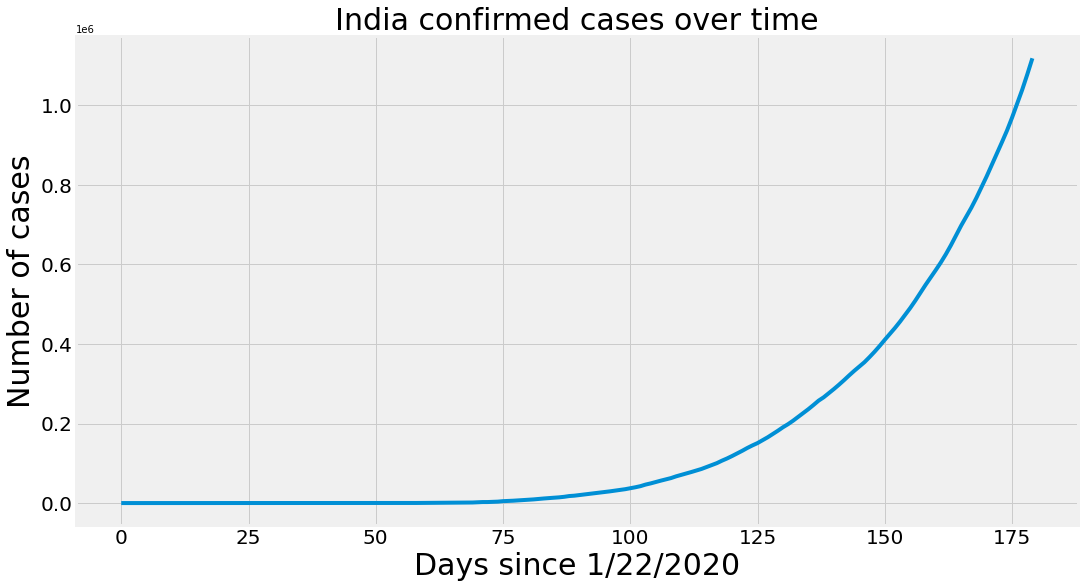

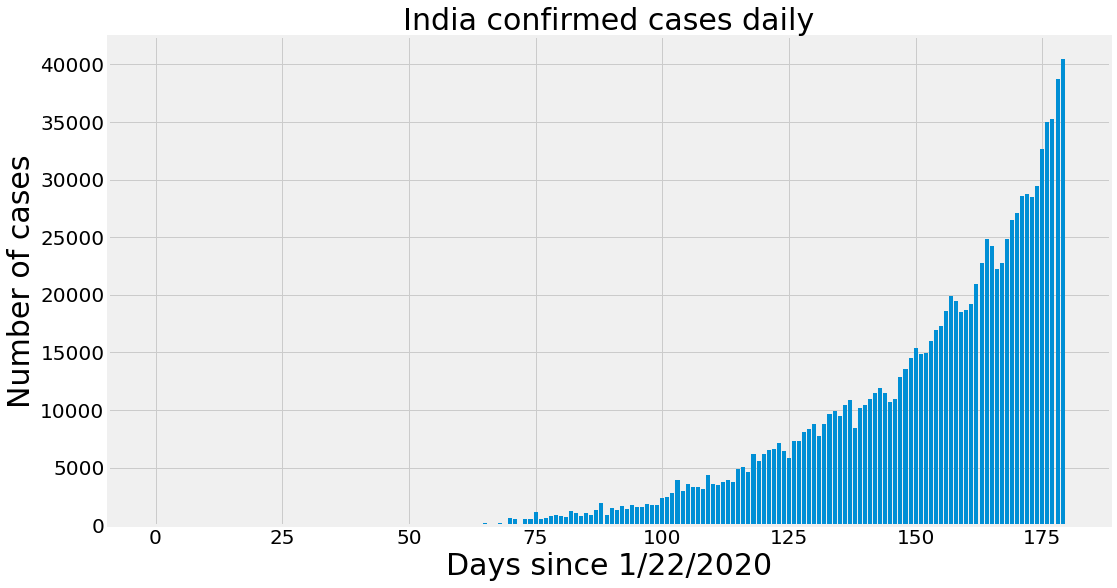

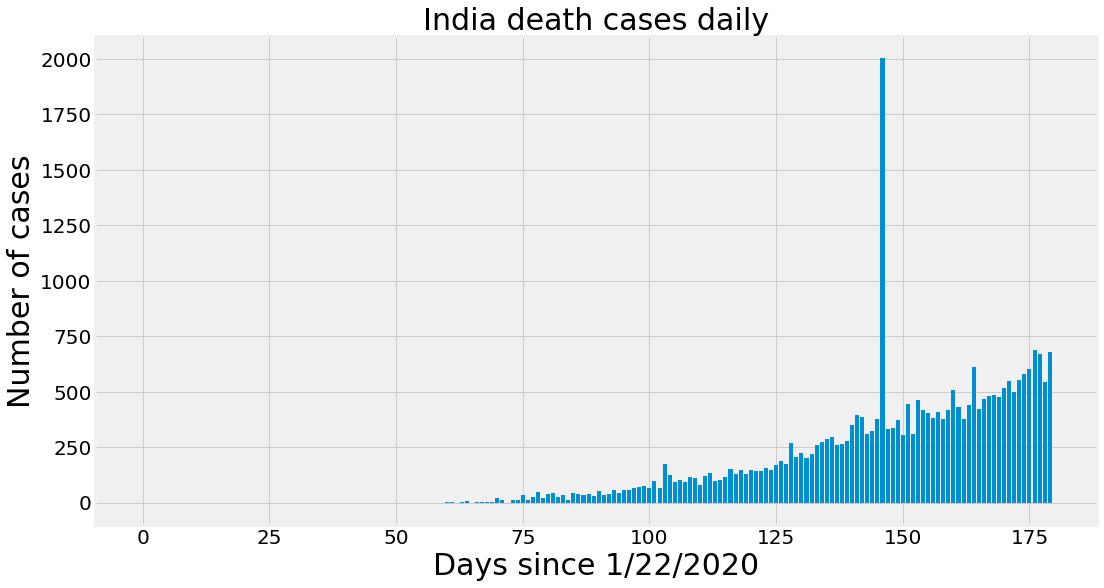

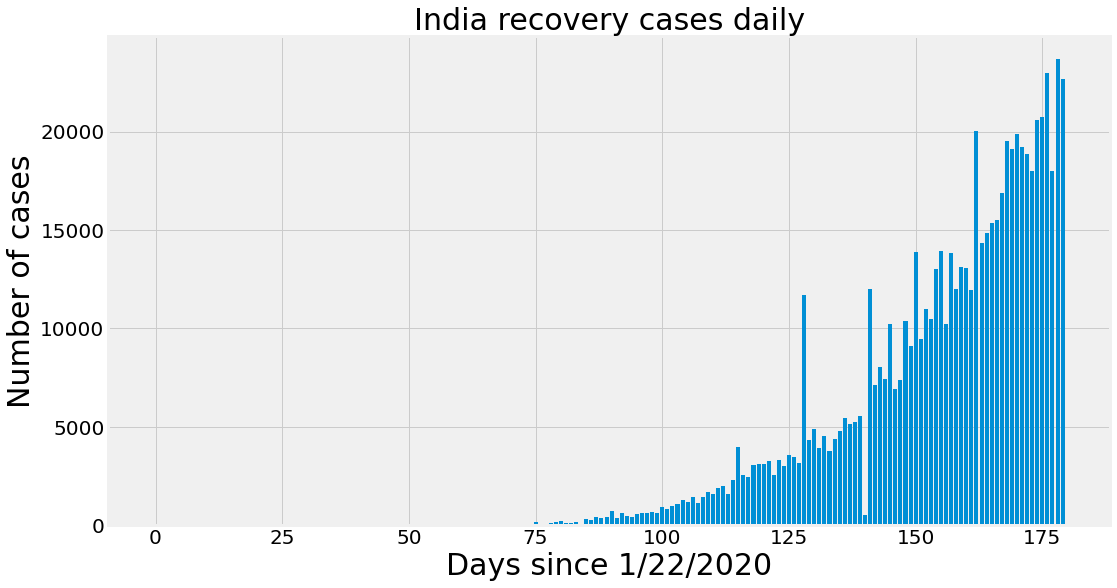

In [ ]:
country_info(adjusted_dates,india_cases,india_daily_increase,india_daily_death,india_daily_recoveries,"India")

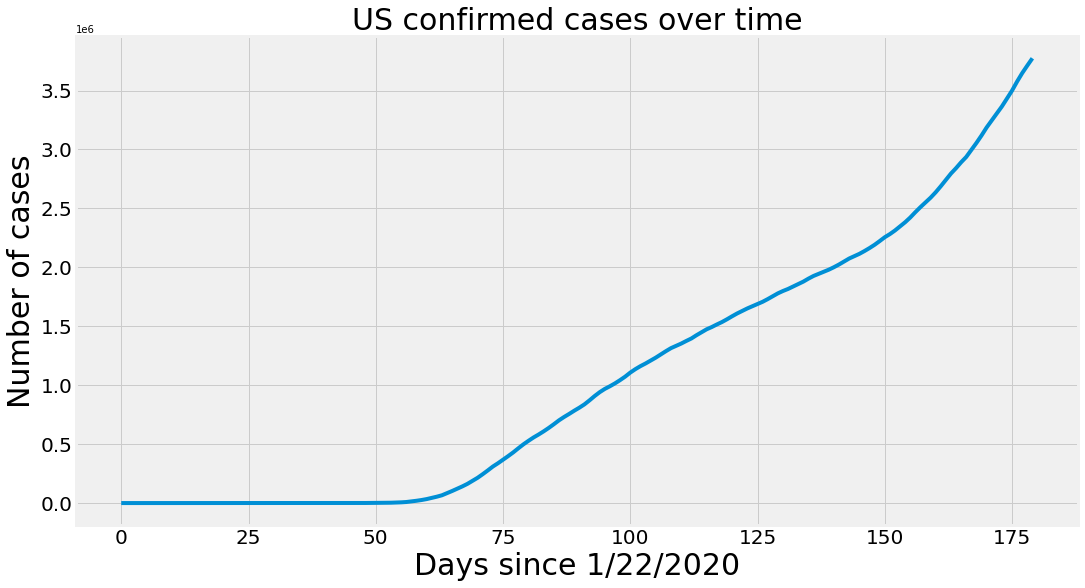

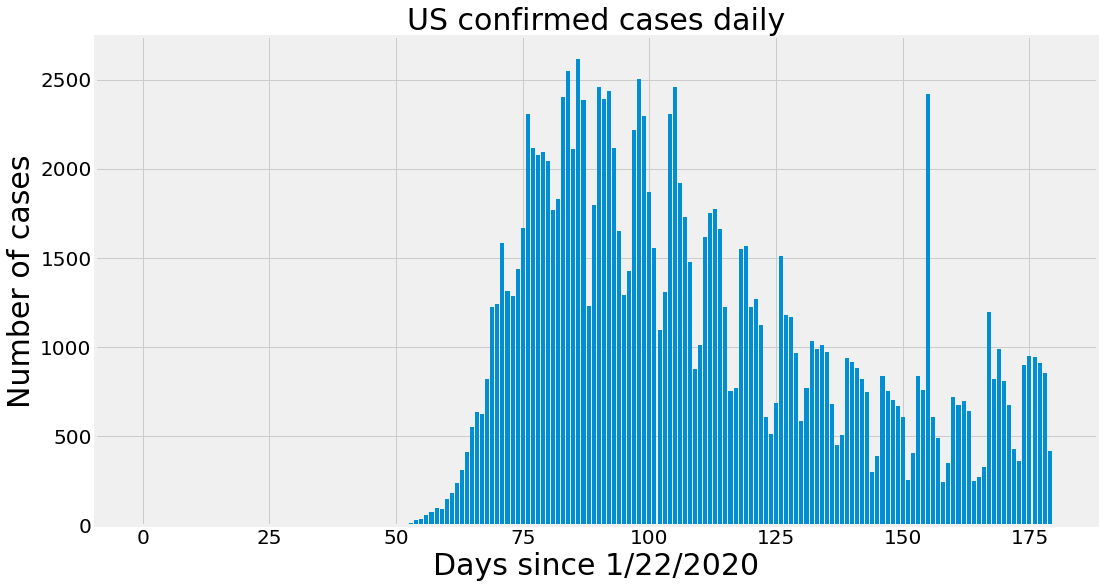

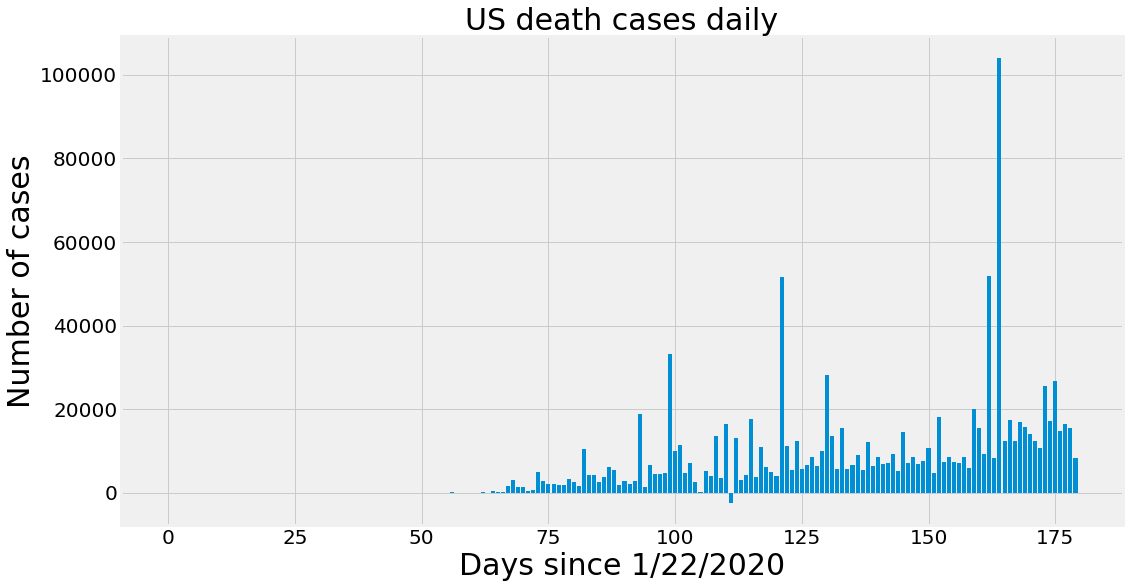

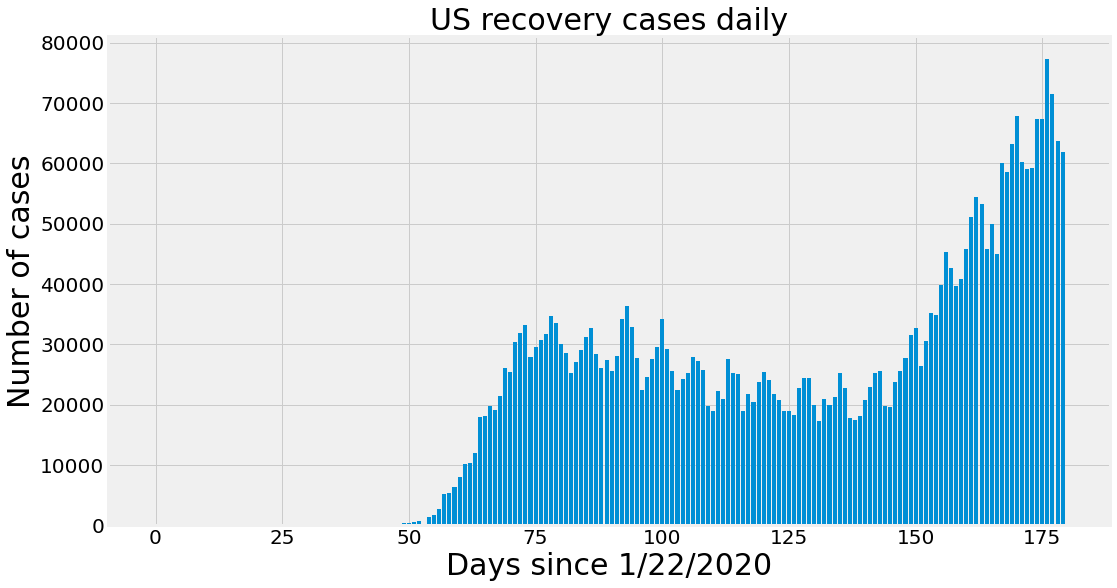

In [ ]:
country_info(adjusted_dates,us_cases,us_daily_death,us_daily_recoveries,us_daily_increase,"US")

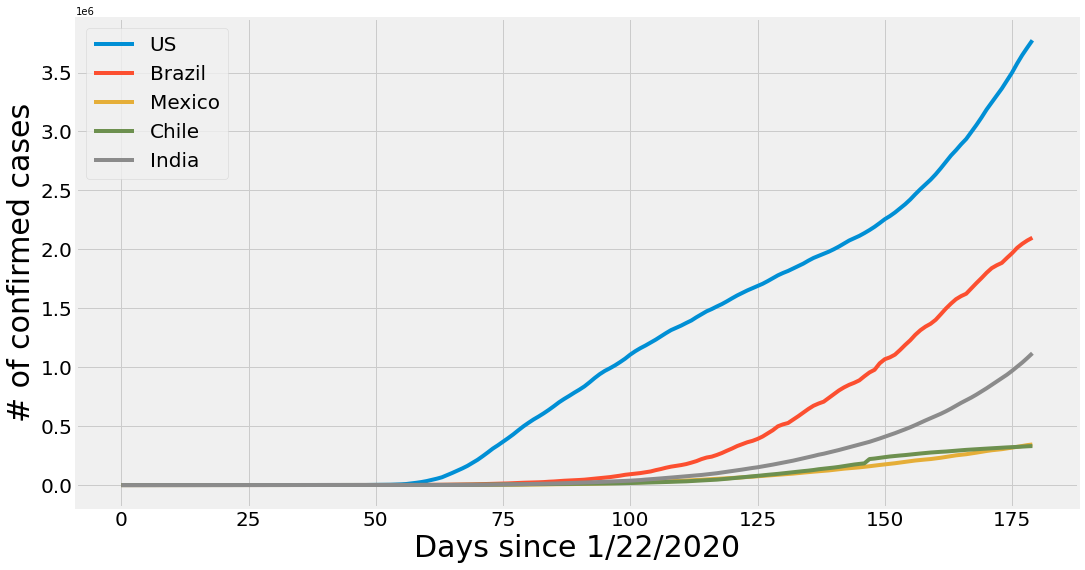

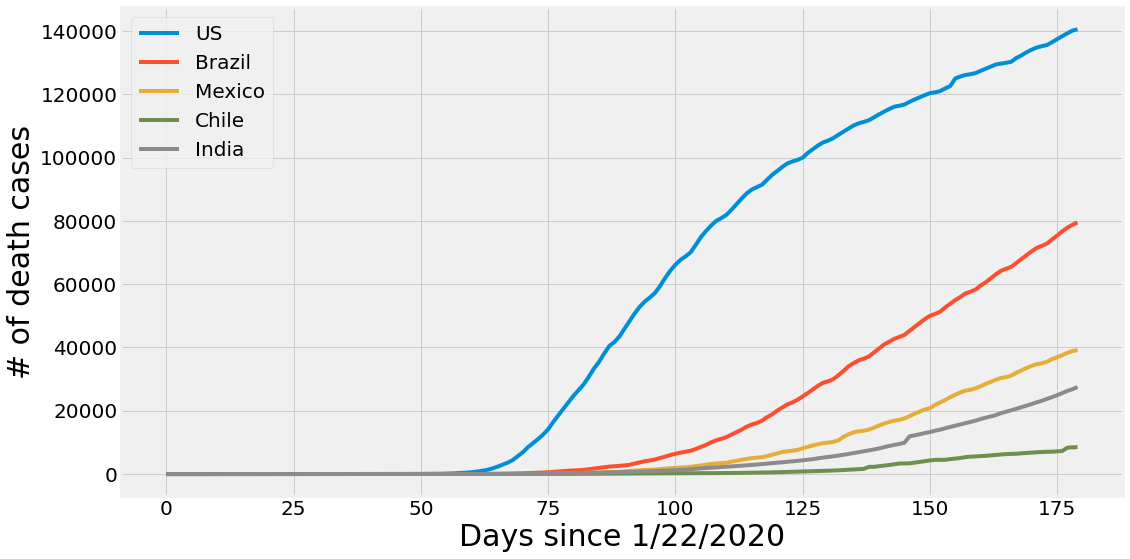

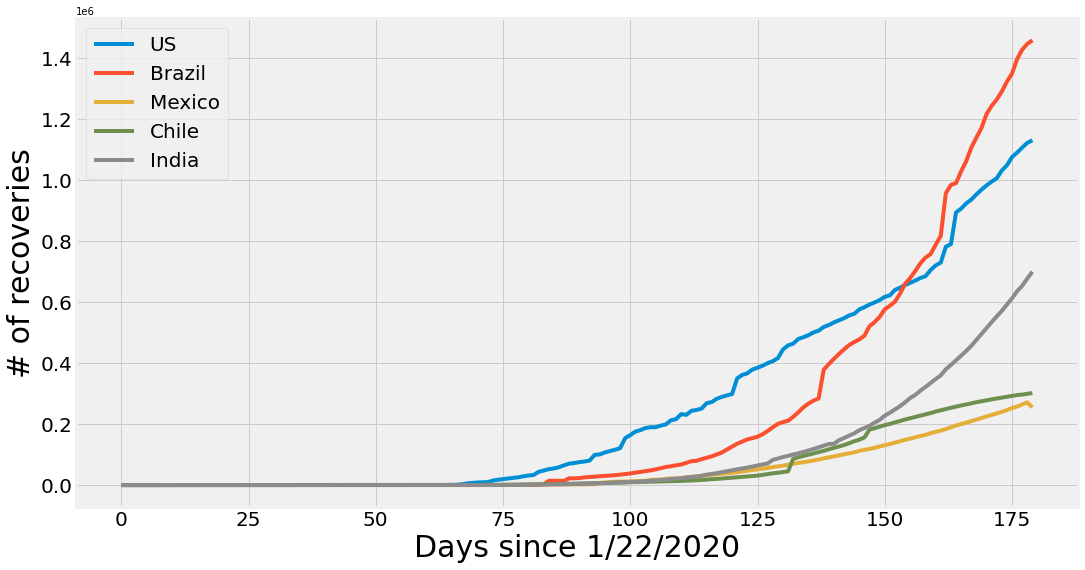

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,us_cases)
plt.plot(adjusted_dates,brazil_cases)
plt.plot(adjusted_dates,mexico_cases)
plt.plot(adjusted_dates,chile_cases)
plt.plot(adjusted_dates,india_cases)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("# of confirmed cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(["US","Brazil","Mexico","Chile","India"],fontsize=20)


plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,us_death)
plt.plot(adjusted_dates,brazil_death)
plt.plot(adjusted_dates,mexico_death)
plt.plot(adjusted_dates,chile_death)
plt.plot(adjusted_dates,india_death)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("# of death cases",size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(["US","Brazil","Mexico","Chile","India"],fontsize=20)


plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,us_recoveries)
plt.plot(adjusted_dates,brazil_recoveries)
plt.plot(adjusted_dates,mexico_recoveries)
plt.plot(adjusted_dates,chile_recoveries)
plt.plot(adjusted_dates,india_recoveries)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("# of recoveries",size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(["US","Brazil","Mexico","Chile","India"],fontsize=20)



In [ ]:
latest_data['Province_State'].isnull().sum()

169

In [ ]:
unique_state=list(latest_data["Province_State"].unique())

In [ ]:
state_confirmed=[]
state_death=[]
state_recoveries=[]
state_active=[]
mortality_rate=[]
recovery_rate=[]
country=[]

no_cases=[]

for i in unique_state:
  cases=latest_data[latest_data["Province_State"]==i]["Confirmed"].sum()
  if(cases>0):
    state_confirmed.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_state.remove(i)


unique_state=[k for k,v in sorted(zip(unique_state,state_confirmed),key= lambda x : x[1],reverse=True)]
for i in range(len(unique_state)):
  state_confirmed[i]=latest_data[latest_data["Province_State"]==unique_state[i]]["Confirmed"].sum()
  state_death.append(latest_data[latest_data["Province_State"]==unique_state[i]]["Deaths"].sum())
  state_recoveries.append(latest_data[latest_data["Province_State"]==unique_state[i]]["Recovered"].sum())
  state_active.append(state_confirmed[i]-(state_death[i]+state_recoveries[i]))
  mortality_rate.append(state_death[i]/state_confirmed[i])
  recovery_rate.append(state_recoveries[i]/state_confirmed[i])
  country.append(latest_data[latest_data["Province_State"]==unique_state[i]]["Country_Region"].unique()[0])



In [ ]:
state_df=pd.DataFrame({"State":unique_state,
                       "Country":country,
                       "Confirmed":state_confirmed,
                       "Death":state_death,
                       "Recovered":state_recoveries,
                       "Active":state_active,
                       "Mortality_Rate":mortality_rate,
                       "Recovery_rate":recovery_rate})
state_df.style.background_gradient("Greens")

In [ ]:
visual_country=[]
visual_country_confirmed=[]
visual_country_death=[]
visual_country_recovered=[]

for i in range(len(unique_countries[:10])):
  visual_country.append(unique_countries[i])
  visual_country_confirmed.append(country_confirmed_cases[i])
  visual_country_death.append(country_death_cases[i])
  visual_country_recovered.append(country_recovered_cases[i])

others_country_confirmed=np.sum(country_confirmed_cases[10:])
others_country_death=np.sum(country_death_cases[10:])
others_country_recovered=np.sum(country_recovered_cases[10:])

visual_country.append("Others")
visual_country_confirmed.append(others_country_confirmed)
visual_country_death.append(others_country_death)
visual_country_recovered.append(others_country_recovered)


In [ ]:
def plot_bar_graph(x,y,title):
  plt.figure(figsize=(16,9))
  plt.barh(x,y)
  plt.title(title,size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

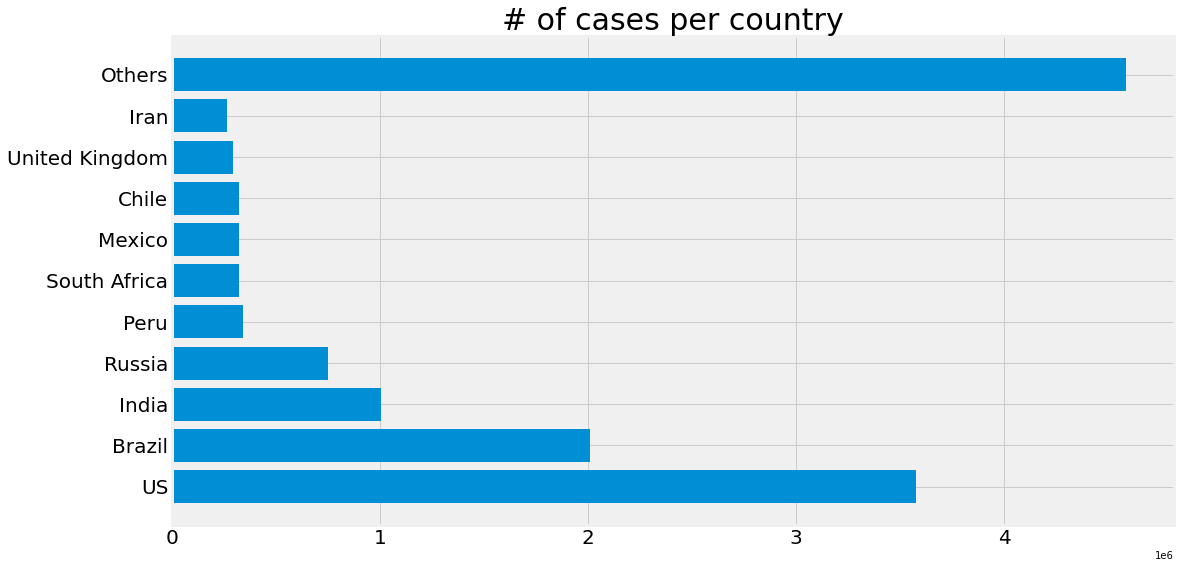

In [ ]:
plot_bar_graph(visual_country,visual_country_confirmed,"# of cases per country")

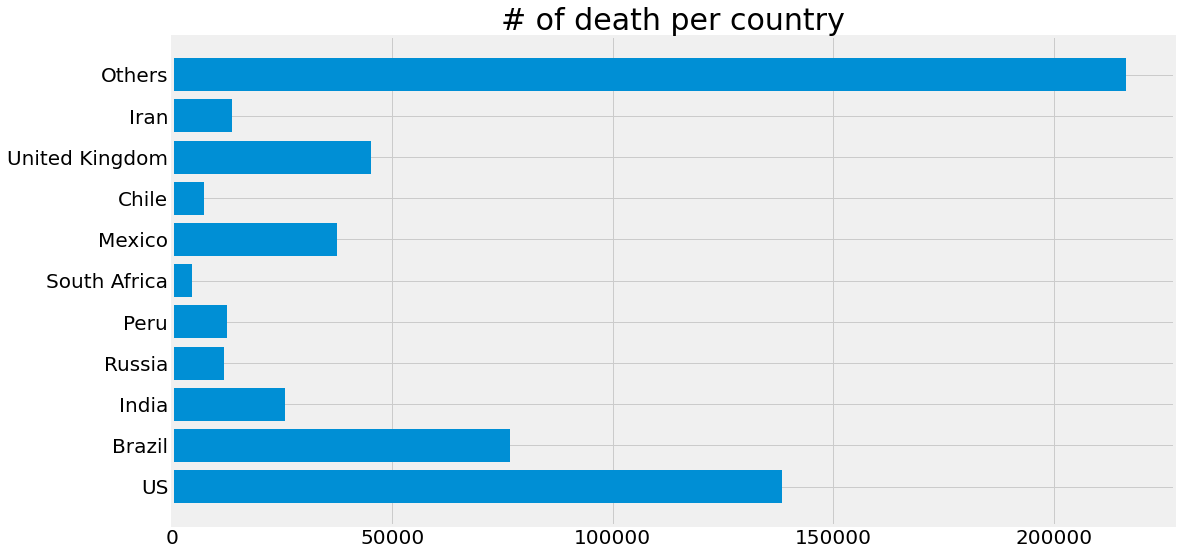

In [ ]:
plot_bar_graph(visual_country,visual_country_death,"# of death per country")

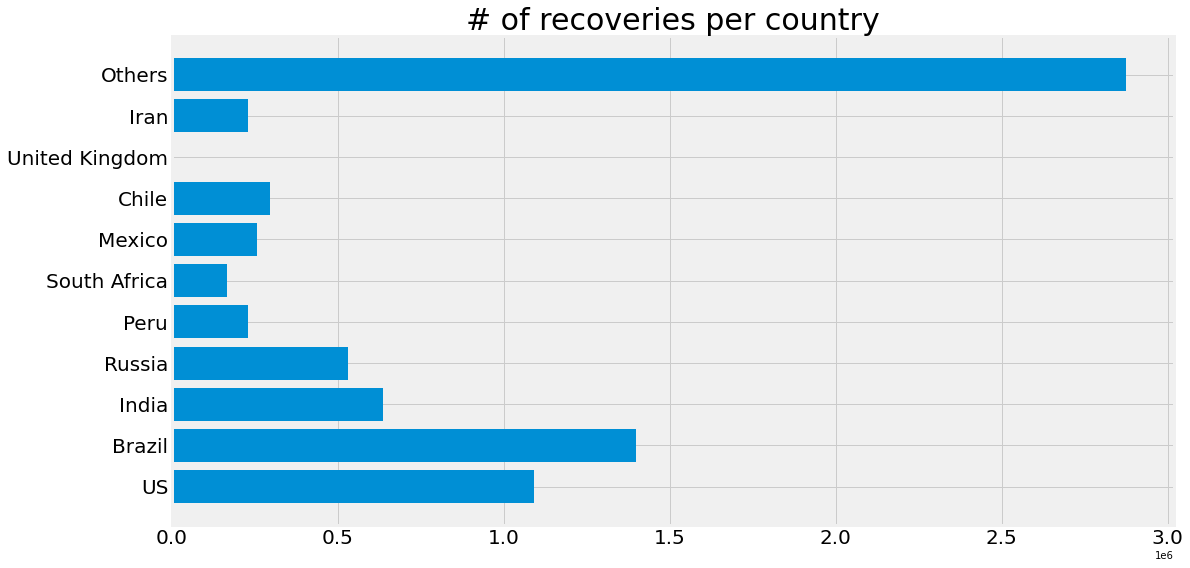

In [ ]:
plot_bar_graph(visual_country,visual_country_recovered,"# of recoveries per country")

In [ ]:
visual_state=[]
visual_state_confirmed=[]
visual_state_death=[]
visual_state_recovered=[]

for i in range(len(unique_state[:10])):
  visual_state.append(unique_state[i])
  visual_state_confirmed.append(state_confirmed[i])
  visual_state_death.append(state_death[i])
  visual_state_recovered.append(state_recoveries[i])

others_state_confirmed=np.sum(state_confirmed[10:])
others_state_death=np.sum(state_death[10:])
others_state_recovered=np.sum(state_recoveries[10:])

visual_state.append("Others")
visual_state_confirmed.append(others_state_confirmed)
visual_state_death.append(others_state_death)
visual_state_recovered.append(others_state_recovered)


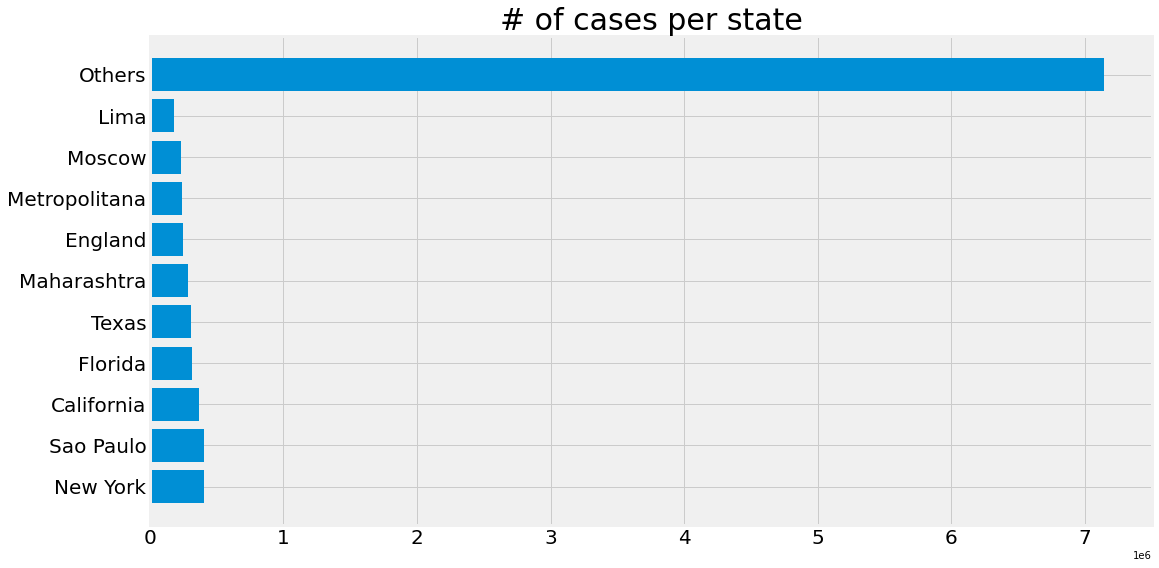

In [ ]:
plot_bar_graph(visual_state,visual_state_confirmed,"# of cases per state")

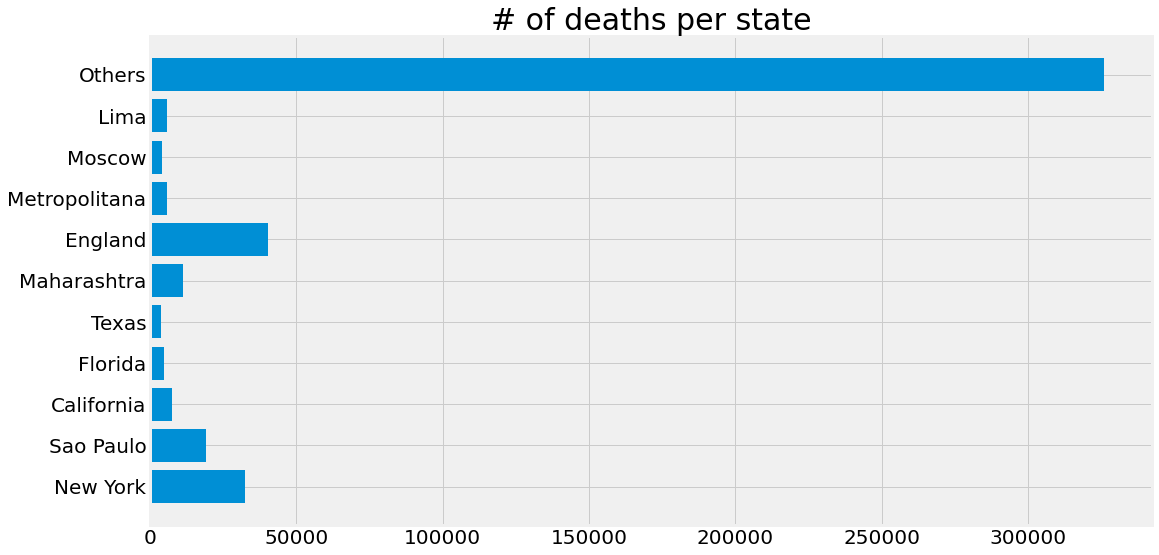

In [ ]:
plot_bar_graph(visual_state,visual_state_death,"# of deaths per state")

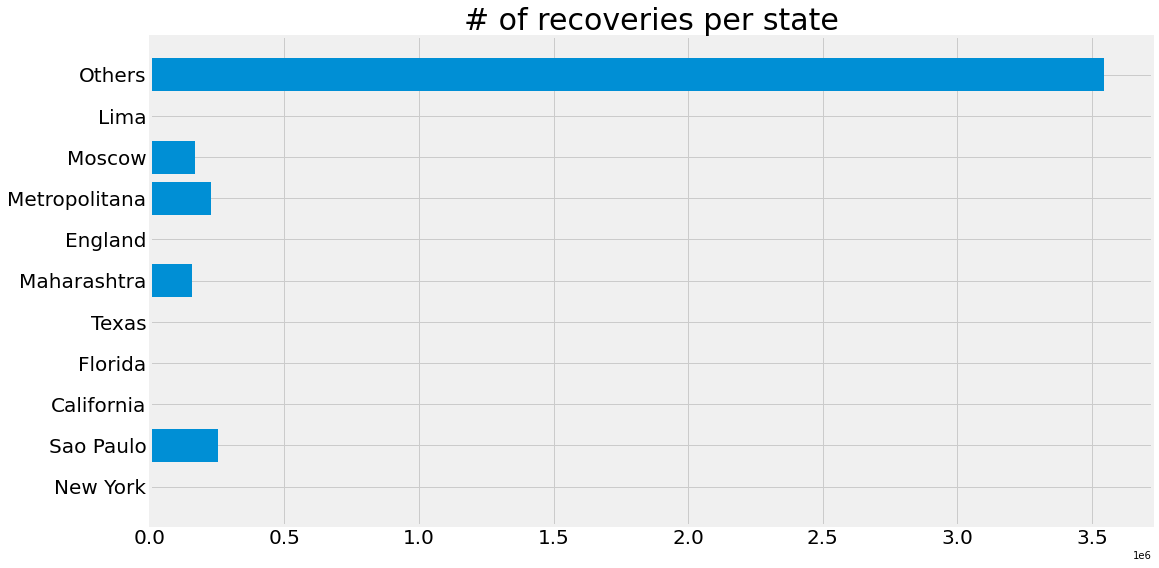

In [ ]:
plot_bar_graph(visual_state,visual_state_recovered,"# of recoveries per state")

In [ ]:
def plot_pie_chart(x,y,title):
  c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
  plt.figure(figsize=(16,9))
  plt.pie(y,colors=c)
  plt.title(title,size=20)
  plt.legend(x,fontsize=15)
  plt.show()

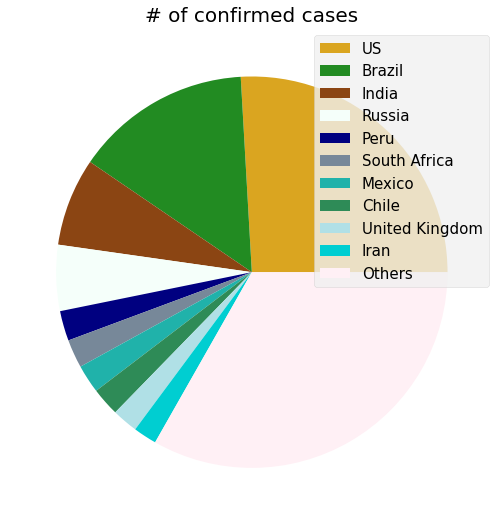

In [ ]:
plot_pie_chart(visual_country,visual_country_confirmed,"# of confirmed cases")

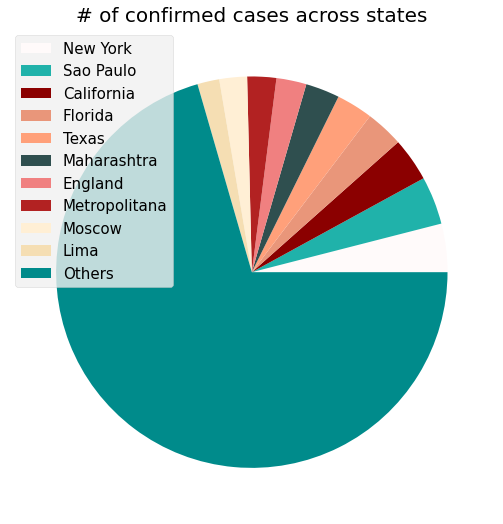

In [ ]:
plot_pie_chart(visual_state,visual_state_confirmed,"# of confirmed cases across states")

In [ ]:
def plot_pie_country_region(country_name):
  regions=list(latest_data[latest_data.Country_Region==country_name]["Province_State"].unique())
  region_confirmed=[]
  region_death=[]
  region_active=[]
  region_recovered=[]
  region_no_cases=[]
  for i in regions:
    cases=latest_data[latest_data.Province_State==i]["Confirmed"].sum()
    if(cases>0):
      region_confirmed.append(cases)
    else:
      region_no_cases.append(i)
  for i in region_no_cases:
      regions.remove(i)
    
  regions=[k for k,v in sorted(zip(regions,region_confirmed),key=lambda x:x[1],reverse=True)]
  for i in range(len(regions)):
     region_confirmed[i]=latest_data[latest_data.Province_State==regions[i]]["Confirmed"].sum()
     region_death.append(latest_data[latest_data.Province_State==regions[i]]["Deaths"].sum())
     region_active.append(latest_data[latest_data.Province_State==regions[i]]["Active"].sum())
     region_recovered.append(latest_data[latest_data.Province_State==regions[i]]["Recovered"].sum())
  if(len(regions)>5):
    region_5=regions[:5]
    region_5_confirmed=region_confirmed[:5]
    region_5.append("Others")
    region_5_confirmed.append(np.sum(region_confirmed[5:]))
    region_5_death=region_death[:5]
    region_5_active=region_active[:5]
    region_5_recovered=region_recovered[:5]
    region_5_death.append(np.sum(region_death[5:]))
    region_5_active.append(np.sum(region_active[5:]))
    region_5_recovered.append(np.sum(region_recovered[5:]))
    plot_pie_chart(region_5,region_5_confirmed,"# of confirmed cases accross various states in {}".format(country_name))
    plot_pie_chart(region_5,region_5_death,"# of death cases accross various states in {}".format(country_name))
    plot_pie_chart(region_5,region_5_active,"# of active cases accross various states in {}".format(country_name))
    plot_pie_chart(region_5,region_5_recovered,"# of recovered cases accross various states in {}".format(country_name))
  else:
    plot_pie_chart(regions,region_confirmed,"# of confirmed cases accross various states in {}".format(country_name))
    plot_pie_chart(regions,region_death,"# of death cases accross various states in {}".format(country_name))
    plot_pie_chart(regions,region_active,"# of active cases accross various states in {}".format(country_name))
    plot_pie_chart(regions,region_recovered,"# of recovered cases accross various states in {}".format(country_name))



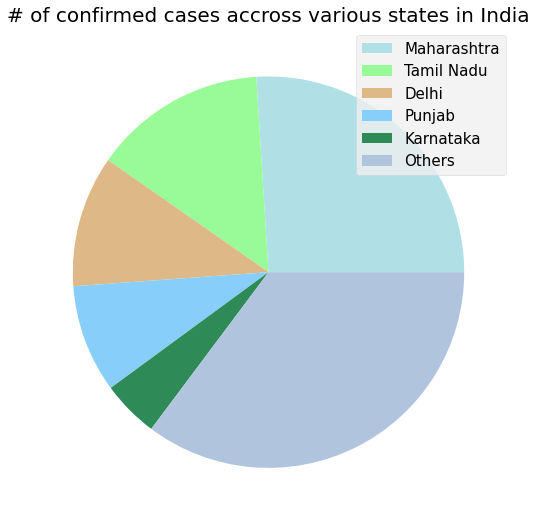

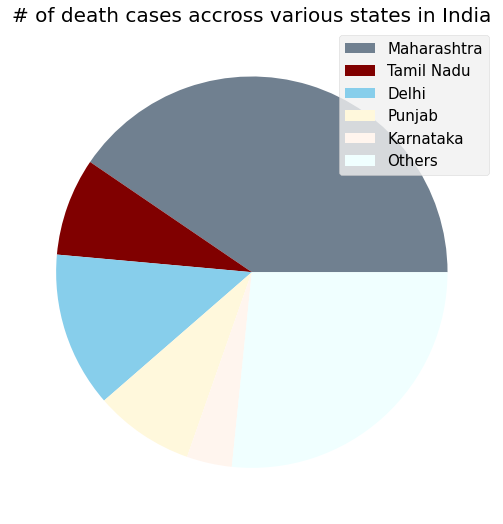

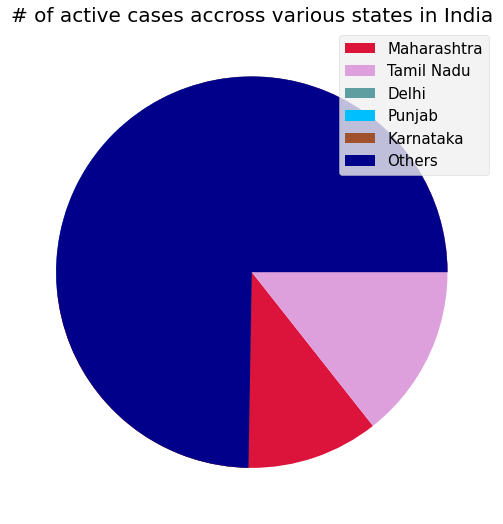

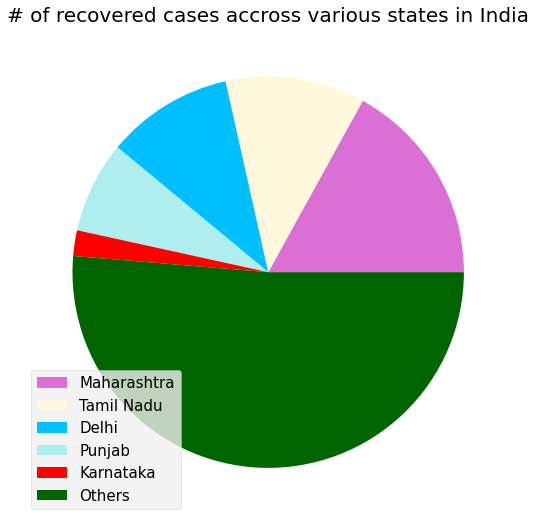

In [ ]:
plot_pie_country_region("India")

In [ ]:
us_medical_data.head()

Province_State Country_Region  ...  Testing_Rate  Hospitalization_Rate
0         Alabama             US  ...  11239.816568             12.414877
1          Alaska             US  ...  22284.616804                   NaN
2  American Samoa             US  ...   1863.733578                   NaN
3         Arizona             US  ...  10293.929548              4.677111
4        Arkansas             US  ...  13286.515625              6.408691

[5 rows x 18 columns]

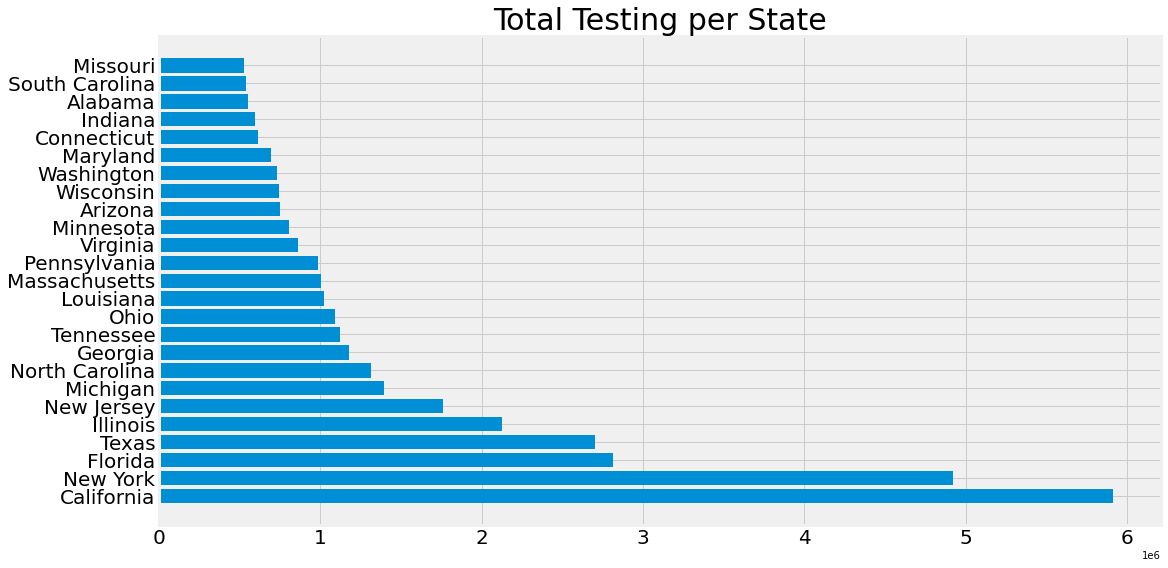

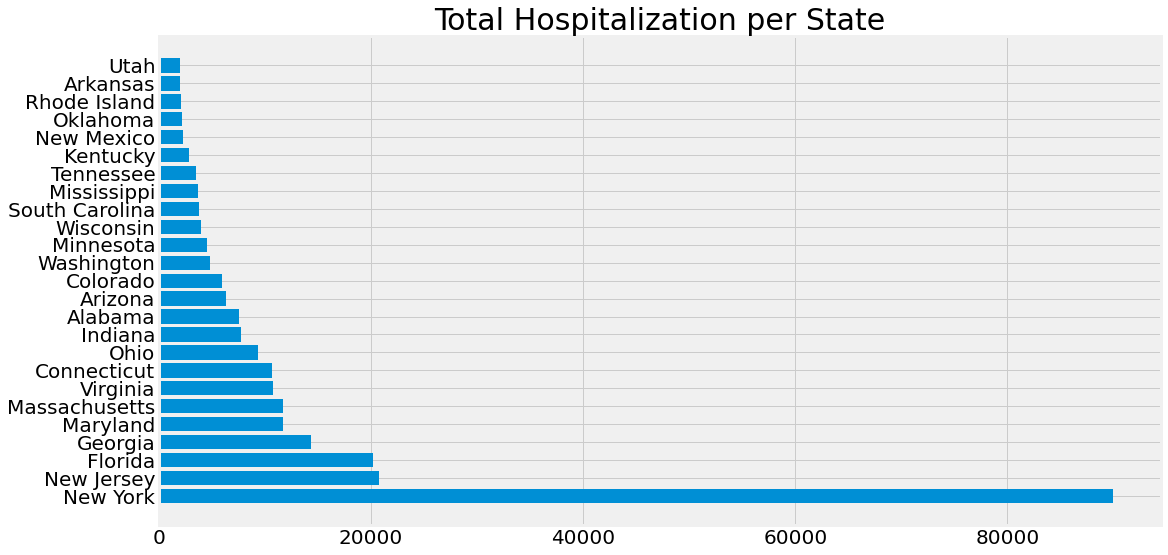

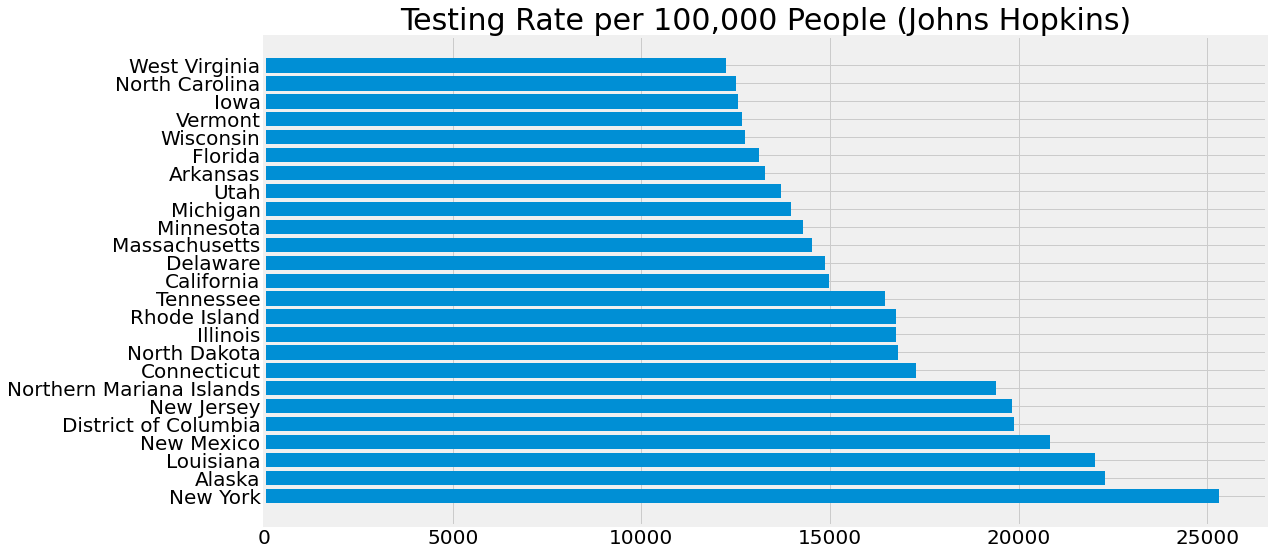

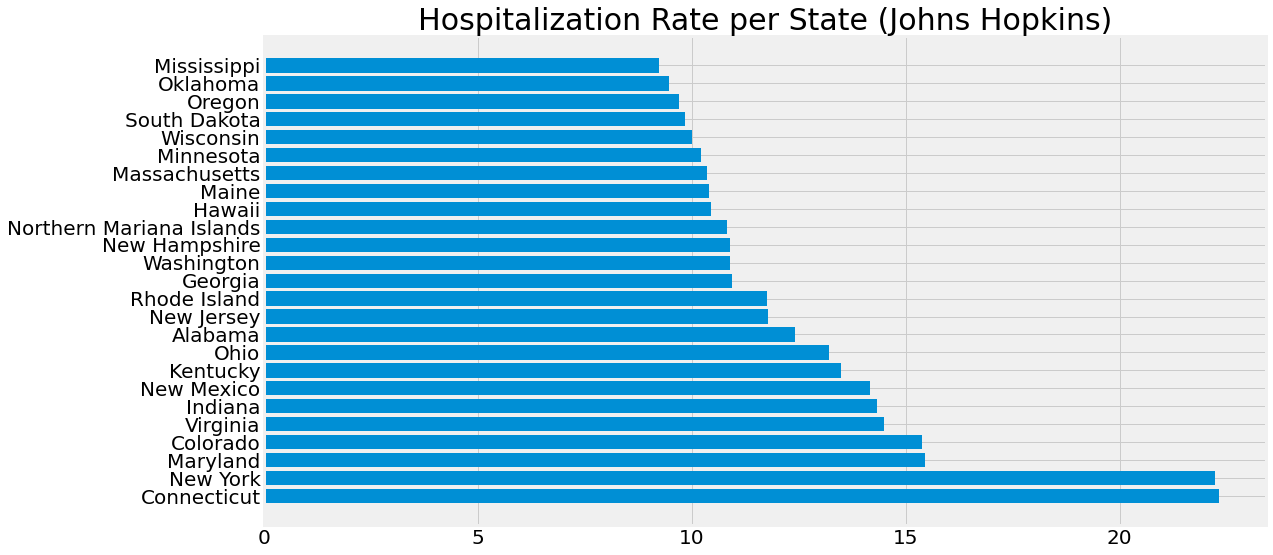

In [ ]:
us_medical_data.fillna(value=0, inplace=True)

def plot_us_medical_data():
    states = us_medical_data['Province_State'].unique()
    testing_number = []
    hospitalization_number = [] 
    testing_rate = []
    hospitalization_rate = []
    
    for i in states:
        testing_number.append(us_medical_data[us_medical_data['Province_State']==i]['People_Tested'].sum())
        hospitalization_number.append(us_medical_data[us_medical_data['Province_State']==i]['People_Hospitalized'].sum())
        testing_rate.append(us_medical_data[us_medical_data['Province_State']==i]['Testing_Rate'].max())
        hospitalization_rate.append(us_medical_data[us_medical_data['Province_State']==i]['Hospitalization_Rate'].max())
    
    # only show the top 15 states
    testing_states = [k for k, v in sorted(zip(states, testing_number), key=lambda x : x[1], reverse=True)]
    hospitalization_states = [k for k, v in sorted(zip(states, hospitalization_number), key=lambda x : x[1], reverse=True)]
    testing_rate_states = [k for k, v in sorted(zip(states, testing_rate), key=lambda x : x[1], reverse=True)]
    hospitalization_rate_states = [k for k, v in sorted(zip(states, hospitalization_rate), key=lambda x : x[1], reverse=True)]
    
    for i in range(len(states)):
        testing_number[i] = us_medical_data[us_medical_data['Province_State']==testing_states[i]]['People_Tested'].sum()
        hospitalization_number[i] = us_medical_data[us_medical_data['Province_State']==hospitalization_states[i]]['People_Hospitalized'].sum()
        testing_rate[i] = us_medical_data[us_medical_data['Province_State']==testing_rate_states[i]]['Testing_Rate'].sum()
        hospitalization_rate[i] = us_medical_data[us_medical_data['Province_State']==hospitalization_rate_states[i]]['Hospitalization_Rate'].sum()
    
    plot_bar_graph(testing_states[:25], testing_number[:25], 'Total Testing per State')
    plot_bar_graph(hospitalization_states[:25], hospitalization_number[:25], 'Total Hospitalization per State')
    plot_bar_graph(testing_rate_states[:25], testing_rate[:25], 'Testing Rate per 100,000 People (Johns Hopkins)')
    plot_bar_graph(hospitalization_rate_states[:25], hospitalization_rate[:25], 'Hospitalization Rate per State (Johns Hopkins)')
    
plot_us_medical_data()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests

from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Using TensorFlow backend.


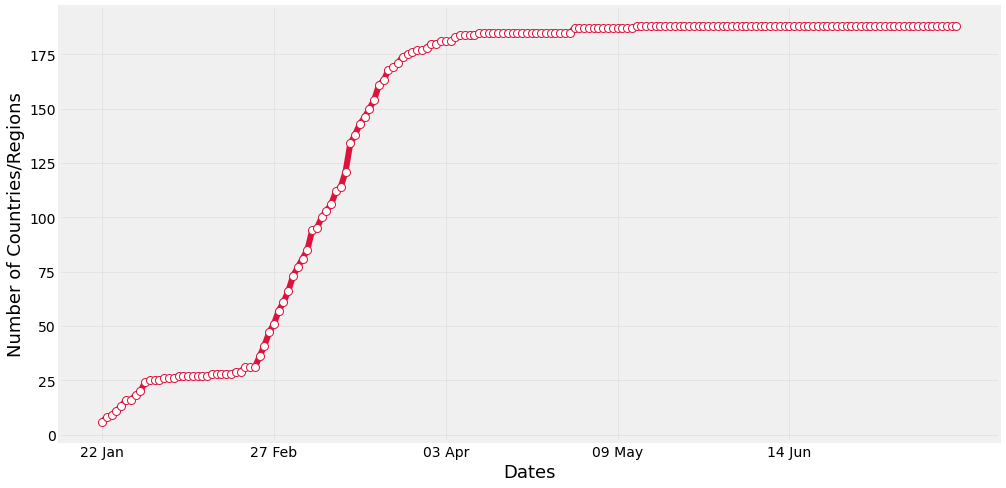

In [ ]:


case_nums_country = confirmed_df.groupby("Country/Region").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=18)
plt.grid(alpha = 0.3)

plt.show()
plt.close()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import SGDRegressor

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], total_confirmed[50:], test_size=0.12, shuffle=False)

In [ ]:

param={"C": [0.01, 0.1, 1],"epsilon": [0.01, 0.1, 1],"degree": [3, 4, 5]}
reg=SVR(kernel="poly")
model=RandomizedSearchCV(reg,param_distributions=param)
model.fit(X_train_confirmed,y_train_confirmed)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='poly',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'degree': [3, 4, 5],
                                        'epsilon': [0.01, 0.1, 1]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
model.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
final_model=SVR(C=1, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
final_model.fit(X_train_confirmed,y_train_confirmed)
pred=final_model.predict(future_forecast)

MAE: 279353.0271302869
MSE: 103933638929.37183


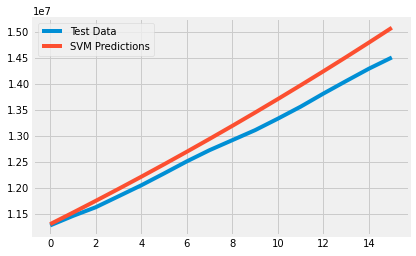

In [ ]:
svm_test_pred = final_model.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

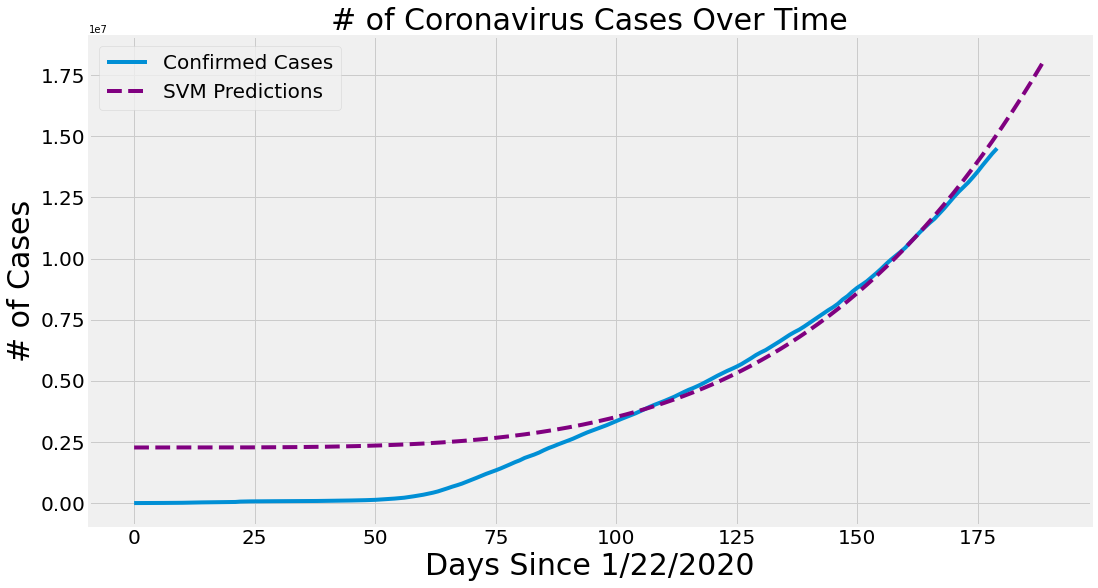

In [ ]:
plot_predictions(adjusted_dates, total_confirmed, pred, 'SVM Predictions', 'purple')

In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/test_data_v70/test_data.csv")[:-1]

In [ ]:
df_test.drop(df_test[df_test["Entity"]=="India - people tested"].index[0],inplace=True)
df_test["country"] = [ c.split(" ")[:-3] for c in df_test["Entity"].values]
df_test = df_test.loc[:,["country","Cumulative total","Cumulative total per thousand"]]

In [ ]:
df_test = df_test.sort_values("Cumulative total",ascending=False)[:23].reset_index().drop(['index'],axis=1)
df_test["country"] = [ c[0] for c in df_test["country"].values]
df_test.loc[0,"country"] ="USA"
df_test.loc[7,"country"] = "United Kingdom"
df_test.loc[12,"country"] = "South Korea"
df_test = df_test.drop([4,10,14])
df_test = df_test.reset_index().drop(['index'],axis=1)
df_test["Cumulative total per million"] = df_test["Cumulative total per thousand"]*1000
df_test = df_test.drop(["Cumulative total per thousand"],axis=1)

In [ ]:
df_test.head()

country  Cumulative total  Cumulative total per million
0      USA           6551810                       19794.0
1   Russia           3945518                       27036.0
2  Germany           2547052                       30400.0
3    Italy           2053425                       33962.0
4   Turkey           1075048                       12747.0

In [ ]:
country_data_2=country_data
country_data_2.set_index("Country")

Confirmed  Deaths  ...  Mortality_Rate  Recovery_Rate
Country                                   ...                               
US                       3576157  138358  ...        0.038689       0.304977
Brazil                   2012151   76688  ...        0.038112       0.694546
India                    1003832   25602  ...        0.025504       0.633330
Russia                    751612   11920  ...        0.015859       0.706217
Peru                      341586   12615  ...        0.036931       0.676240
...                          ...     ...  ...             ...            ...
Saint Kitts and Nevis         17       0  ...        0.000000       0.882353
Holy See                      12       0  ...        0.000000       1.000000
Papua New Guinea              11       0  ...        0.000000       0.727273
Western Sahara                10       1  ...        0.100000       0.800000
MS Zaandam                     9       2  ...        0.222222       0.000000

[188 rows x 6 columns]

In [ ]:
L=list(country_data.Country)
M=list(df_test.country)
print(M)


['USA', 'Russia', 'Germany', 'Italy', 'Turkey', 'Spain', 'United Kingdom', 'India', 'Canada', 'France', 'South Korea', 'Australia', 'Iran', 'Portugal', 'Israel', 'Poland', 'Peru', 'Belgium', 'Austria', 'Kazakhstan']


In [ ]:
M[0]="US"
M[10]="Korea, South"
print(M)

['US', 'Russia', 'Germany', 'Italy', 'Turkey', 'Spain', 'United Kingdom', 'India', 'Canada', 'France', 'Korea, South', 'Australia', 'Iran', 'Portugal', 'Israel', 'Poland', 'Peru', 'Belgium', 'Austria', 'Kazakhstan']


In [ ]:
K=[]
for i in M:
  K.append(L.index(i))

In [ ]:
K

[0, 3, 16, 12, 14, 10, 8, 2, 20, 15, 64, 70, 9, 40, 42, 43, 4, 30, 59, 28]

In [ ]:
df_test["confirmed"] = [ country_data_2.loc[c,"Confirmed"] for c in K]
df_test["deaths"] = [ country_data.loc[c,'Deaths'] for c in K]
df_test["MR"] = [country_data.loc[c,"Mortality_Rate"] for c in K]
df_test["Positive"] = (np.array(df_test["confirmed"])/np.array(df_test["Cumulative total"]))*100

df_test.style.background_gradient("Greens")


In [ ]:
import plotly.express as px
fig = px.bar(df_test.sort_values("Cumulative total"),
            x='country', y="Cumulative total",
            text = "MR",
            hover_name="country",
            hover_data=["confirmed","deaths","Cumulative total","Positive"],
            title='COVID-19: Tests Over Countries',
)
fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="Number of Tests (Text on bars is MR %)")
fig.show()

In [ ]:
fig = px.bar(df_test.sort_values("Positive"),
            x='country', y="Positive",
            text = "MR",
            hover_name="country",
            hover_data=["confirmed","deaths","Cumulative total","Positive"],
            title='COVID-19: Test(Positive) Over Countries',
)
fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="Positive Tests(%)- (Text on bars is MR %)")
fig.show()

In [ ]:
fig = px.bar(df_test.sort_values("MR"),
            x='country', y="MR",
            text = "Positive",
            hover_name="country",
            hover_data=["confirmed","deaths","Cumulative total","Positive"],
            title='COVID-19: MR Over Countries',
)
fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="MR(%)- (Text on bars is Positive %)")
fig.show()

In [ ]:
fig = px.bar(df_test.sort_values("Cumulative total per million"),
            x='country', y="Cumulative total per million",
            text = "MR",
            hover_name="country",
            hover_data=["confirmed","deaths","Cumulative total","Positive"],
            title='COVID-19: Tests per million Over Countries',
)
fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="Tests per million(%)- (Text on bars is MR %)")
fig.show()

In [ ]:
fig = px.scatter(df_test, y=df_test.loc[:,"MR"],
                    x= df_test.loc[:,"Positive"],
                    color= "country", hover_name="country",
                    hover_data=["confirmed","deaths","Cumulative total"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='COVID-19: Test(Positive) vs Mortality rate',
                    size = np.power(df_test["confirmed"]+1,0.3)-0.5,
                    size_max = 30,
                    height =600,
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(title_text="Mortality Rate (%)")
fig.update_xaxes(title_text="Tests Positive (%)")
fig.show()

In [ ]:
df_india_test = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data']).rename(columns = {"totalIndividualsTested":"c_individualtest","totalPositiveCases":"c_positive","totalSamplesTested":"c_tests"})

In [ ]:
df_india_test["p2t_ratio"]= np.round(100*df_india_test["c_positive"]/df_india_test["c_tests"],2)
df_india_test["positive"] = df_india_test["c_positive"].diff()
df_india_test["tests"] = df_india_test["c_tests"].diff()
df_india_test["p2t_ratio"]= np.round(100*df_india_test["positive"]/df_india_test["tests"],2)
df_india_test = df_india_test[1:]

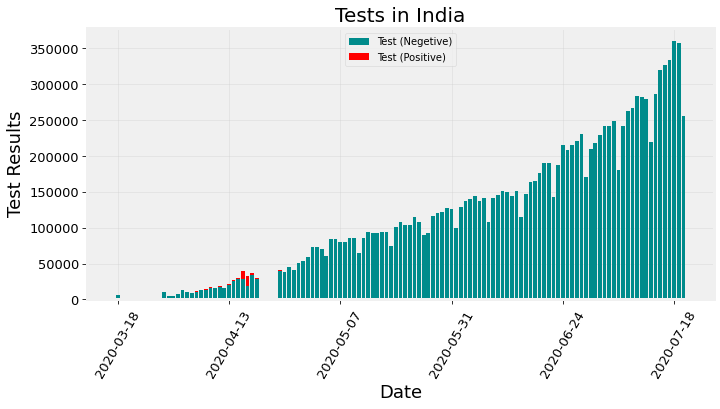

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_india_test["day"],df_india_test["tests"].values[:],color="darkcyan",label="Test (Negetive)"+str())
plt.bar(df_india_test["day"],df_india_test["positive"].values[:],bottom=df_india_test["tests"].values[:]-df_india_test["positive"].values[:],color="Red",label="Test (Positive)")
plt.tick_params(size=5,labelsize = 13)
plt.tick_params(axis="x",size=5,labelsize = 13,labelrotation=60 )
plt.xlabel("Date",fontsize=18)
plt.ylabel("Test Results",fontsize=18)

# X-axis
date = df_india_test["day"].values
plt.xticks(list(np.arange(0,len(date),int(len(date)/5))),date[:-1:int(len(date)/5)])

plt.title("Tests in India",fontsize=20)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('Test_India.png')

In [ ]:
df_india_test["day"].values.shape

(123,)

In [ ]:
df_india_test["c_tests"][-1:].values[0]

14047908.0

In [ ]:
np.round(1000000*df_india_test["c_tests"][-1:].values[0]/1300000000,2)

10806.08

In [ ]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [ ]:
total = df_india.sum()
total.name = "Total"
df_t = pd.DataFrame(total,dtype=float).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["deaths"]/df_t["confirmed"],2)
df_t.style.background_gradient(cmap='Purples',axis=1)

In [ ]:
df_india["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["deaths"]/df_india["confirmed"]),2)
df_india.style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}",subset=["Mortality Rate (per 100)"])

In [ ]:
df_india[df_india['deaths'] > 0].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}",subset=["Mortality Rate (per 100)"])

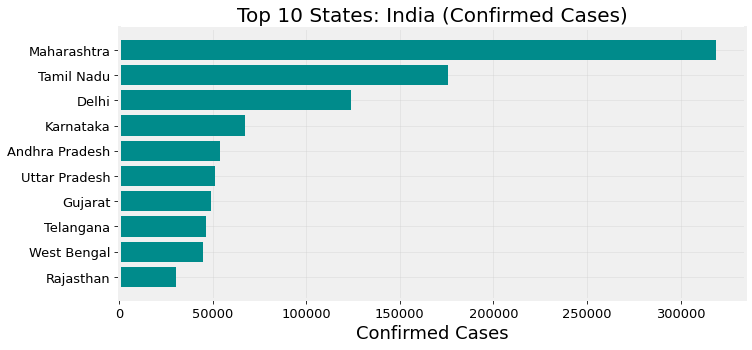

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[-10:],df_india.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: India (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

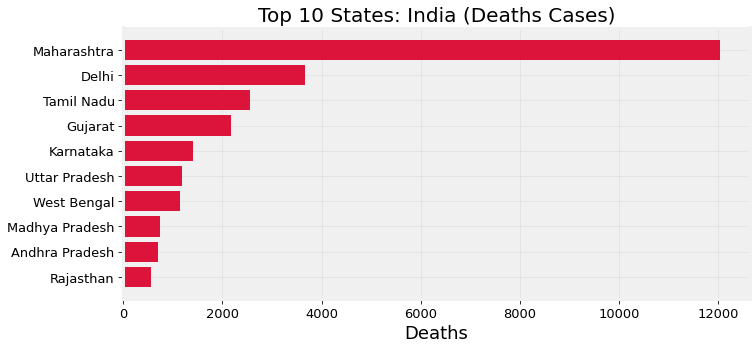

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('deaths')["deaths"].index[-10:],df_india.sort_values('deaths')["deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: India (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
X=india_daily_increase
size=int(len(X)*0.66)
train,test=X[:size],X[size:]
history=[x for x in train]
prediction=[]


for i in range(len(test)):
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    prediction.append(yhat)
    obs=test[i]
    history.append(obs)


In [ ]:
mean_squared_error(test,prediction)